X_train shape is increasing that is (n++, 224, 244, 3) and we create batches with similar shapes of X_train

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import random
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
n = 2
imgsize1 = 128
imgsize2 = 128

9406464/9406464 [==============================] - 1s 0us/step


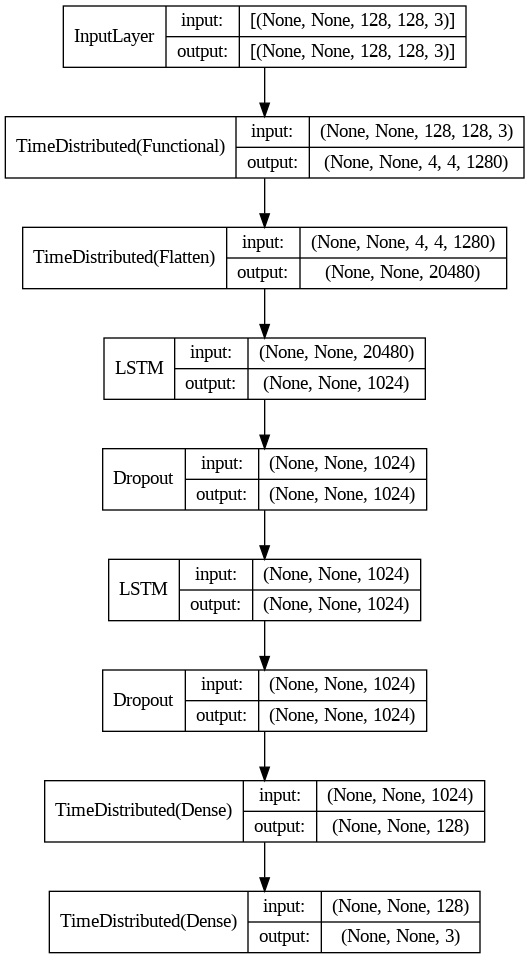

In [ ]:
vgg = tf.keras.applications.MobileNetV2(include_top=False,weights="imagenet",input_shape=(imgsize1,imgsize2,3))
for layer in vgg.layers[:-4]:
    layer.trainable = False
model = Sequential()
model.add(tf.keras.layers.TimeDistributed(vgg, input_shape=(None, imgsize1,imgsize2,3)))
model.add(tf.keras.layers.TimeDistributed(Flatten()))
model.add(tf.keras.layers.LSTM(1024, return_sequences = True))
model.add(Dropout(0.2))
model.add(tf.keras.layers.LSTM(1024, return_sequences = True))
model.add(Dropout(0.2))
model.add(tf.keras.layers.TimeDistributed(Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.4))))
model.add(tf.keras.layers.TimeDistributed(Dense(3, activation=tf.keras.layers.LeakyReLU(alpha=0.4))))
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
# vgg = tf.keras.applications.ConvNeXtBase(model_name="convnext_base",include_top=False,weights="imagenet",input_shape=(imgsize1,imgsize2,3))
# for layer in vgg.layers[:-4]:
#     layer.trainable = False
# model = Sequential()
# model.add(tf.keras.layers.TimeDistributed(vgg, input_shape=(None, imgsize1, imgsize2, 3)))
# model.add(tf.keras.layers.TimeDistributed(Flatten()))
# model.add(tf.keras.layers.LSTM(1024, return_sequences = True))
# model.add(Dropout(0.2))
# model.add(tf.keras.layers.LSTM(1024, return_sequences = True))
# model.add(Dropout(0.2))
# model.add(tf.keras.layers.TimeDistributed(Dense(128, activation='linear')))
# model.add(tf.keras.layers.TimeDistributed(Dense(3, activation='linear')))
# tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
def R_Square(Y, Y_pred) :
  return 1 - (np.sum((Y-Y_pred)*(Y-Y_pred)))/(np.sum((Y - np.mean(Y))*(Y - np.mean(Y))))
def RMSE(Y, Y_pred) :
  return np.sqrt(np.mean((Y - Y_pred)*(Y - Y_pred)))
def RMSEDrift(Y, Y_pred) :
  return np.sqrt(np.mean((Y - Y_pred)*(Y - Y_pred)))/(np.mean(Y))

Data from folder 1
(100, 3) (100, 128, 128, 3) Training Shape (100, 3) (100, 128, 128, 3) Validation Shape
(12, 100, 128, 128, 3) (12, 100, 3) (12, 100, 128, 128, 3) (12, 100, 3)
100
Data from folder 2
(100, 3) (100, 128, 128, 3) Training Shape (100, 3) (100, 128, 128, 3) Validation Shape
(12, 100, 128, 128, 3) (12, 100, 3) (12, 100, 128, 128, 3) (12, 100, 3)
100
Data from folder 3
(100, 3) (100, 128, 128, 3) Training Shape (100, 3) (100, 128, 128, 3) Validation Shape
(12, 100, 128, 128, 3) (12, 100, 3) (12, 100, 128, 128, 3) (12, 100, 3)
100
Data from folder 4
(100, 3) (100, 128, 128, 3) Training Shape (100, 3) (100, 128, 128, 3) Validation Shape
(12, 100, 128, 128, 3) (12, 100, 3) (12, 100, 128, 128, 3) (12, 100, 3)
100
Data from folder 5
(100, 3) (100, 128, 128, 3) Training Shape (100, 3) (100, 128, 128, 3) Validation Shape
(12, 100, 128, 128, 3) (12, 100, 3) (12, 100, 128, 128, 3) (12, 100, 3)
100
Data from folder 6
(100, 3) (100, 128, 128, 3) Training Shape (100, 3) (100, 128, 128

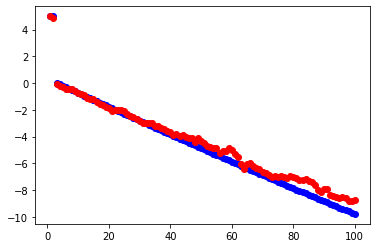

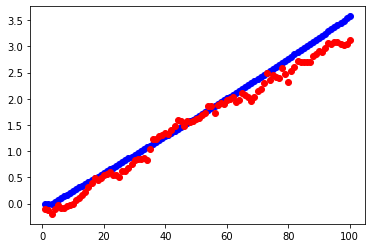

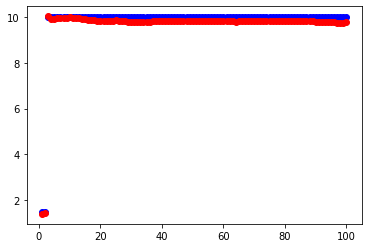

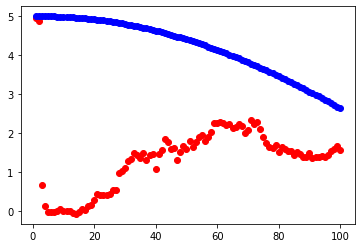

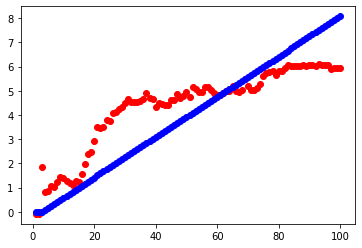

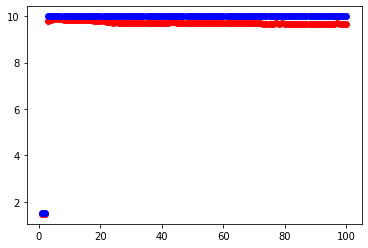

-0.7776234030003886 -0.8832680023200475 30.0
4.20372340515256 0.8888202726561576 9.83


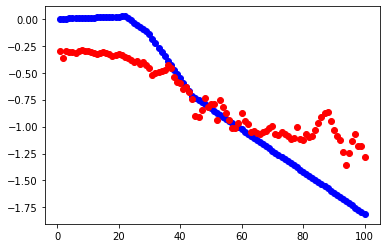

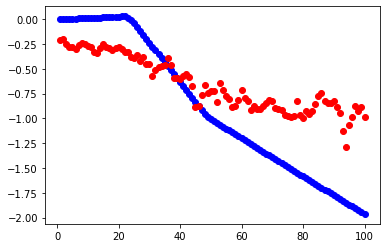

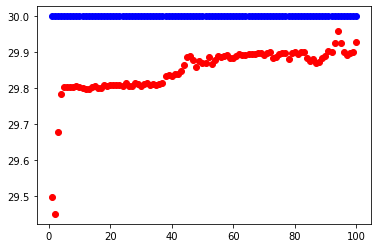

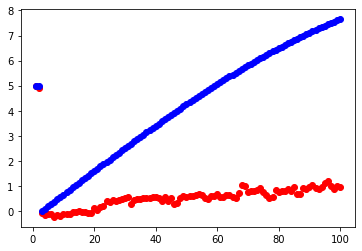

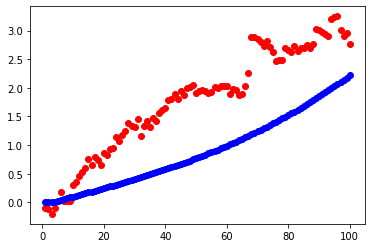

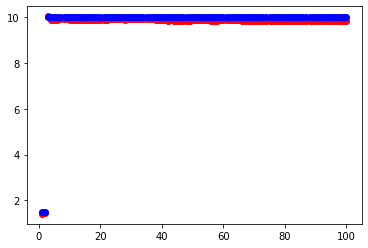

0.07531966234617676 -1.3799806777701962 30.0
0.1086311978428117 -2.3680059470594976 30.0


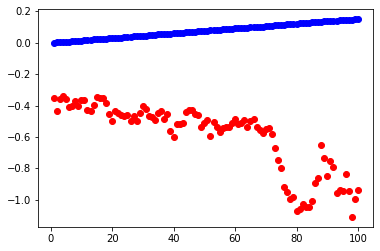

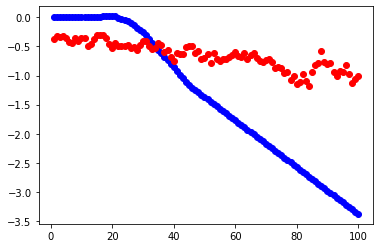

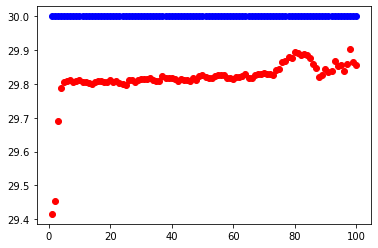

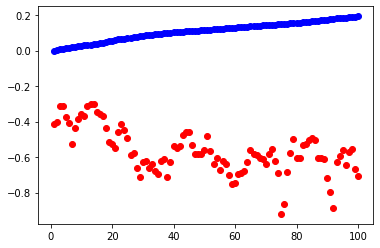

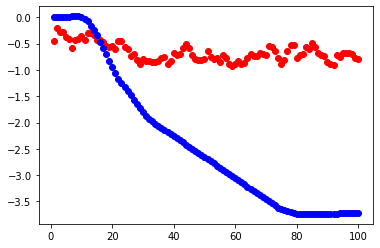

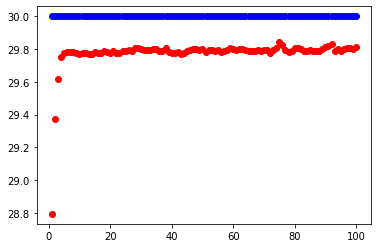

0.9377635833248497 4.188817882463336 9.83
0.1086311978428117 -2.3680059470594976 30.0


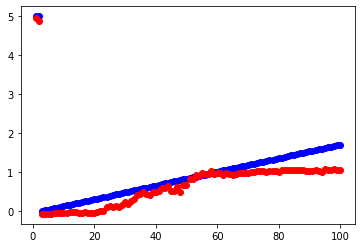

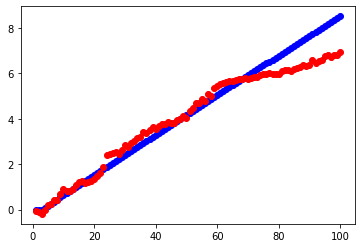

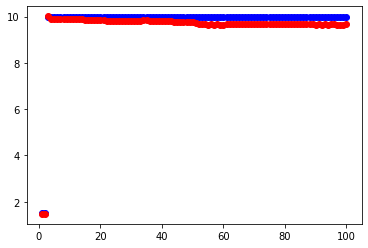

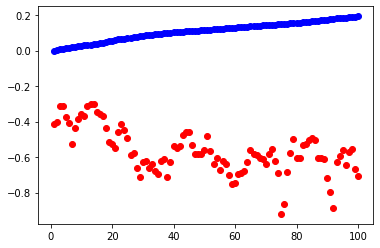

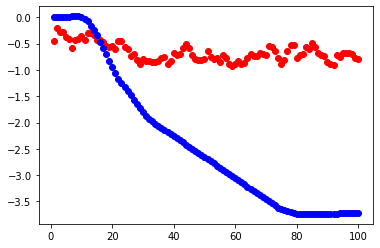

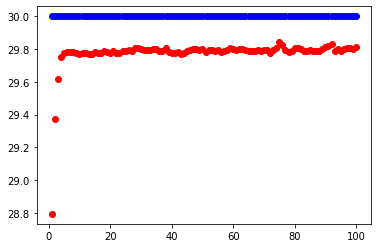

0.1 3.9608332542330027 9.83
0.1 3.9608332542330027 9.83


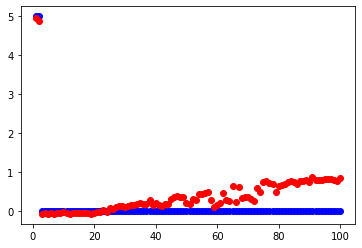

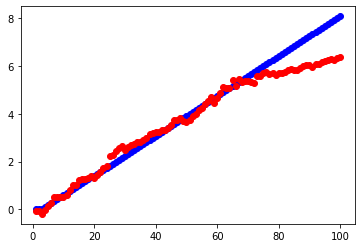

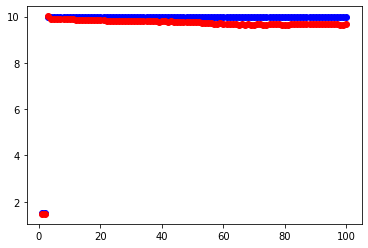

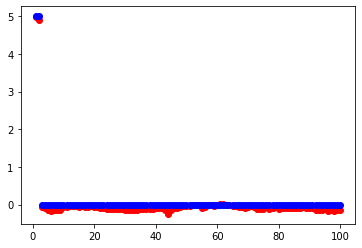

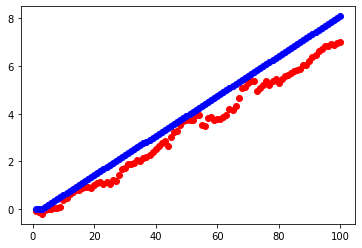

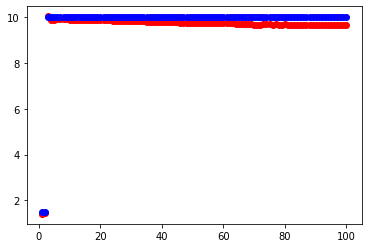

0.1 3.9608332542330027 9.83
0.1 3.9608332542330027 9.83


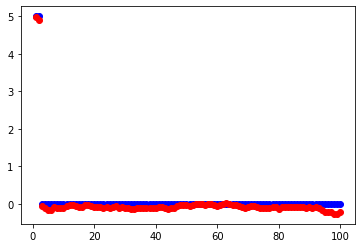

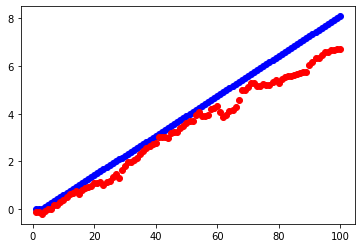

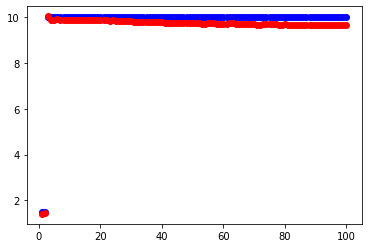

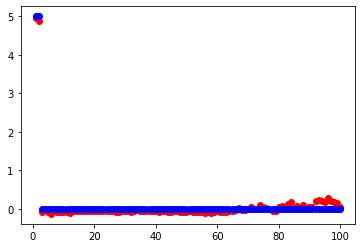

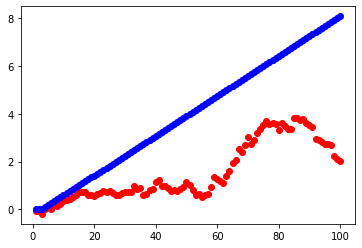

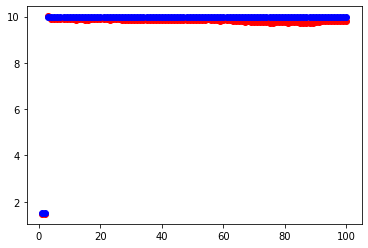

0.22481359226163478 3.9608332542330027 9.83
0.1 3.9608332542330027 9.83


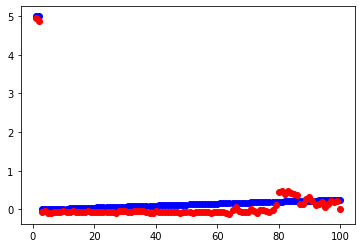

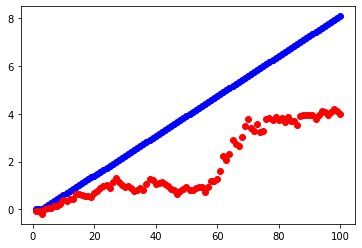

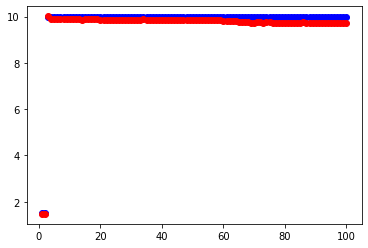

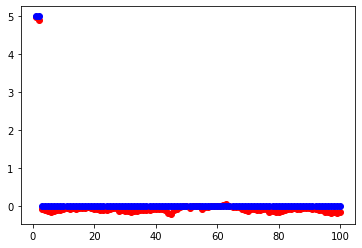

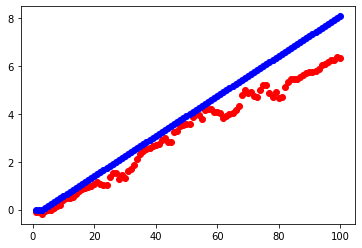

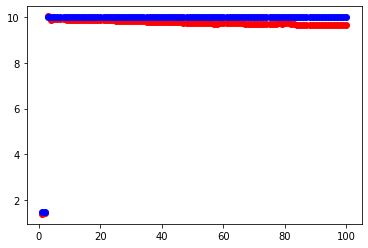

0.1 3.9608332542330027 9.83
4.744787178039551 7.380602795630693 9.83


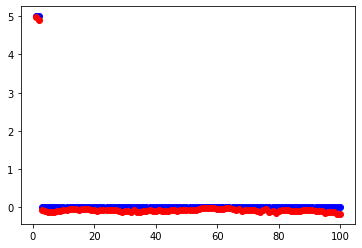

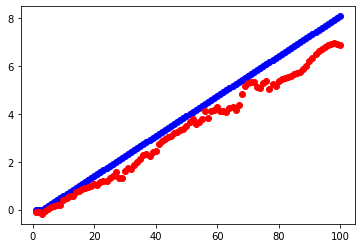

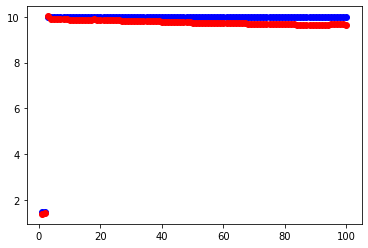

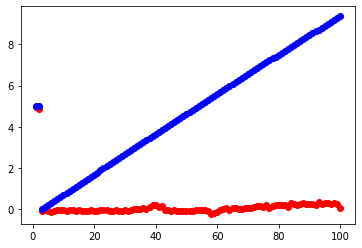

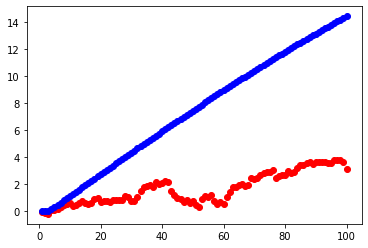

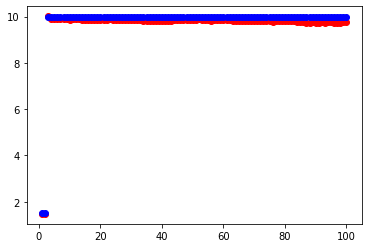

-3.1768793487548828 0.5410637534502893 9.83
4.060833254233002 3.9608332542330027 9.83


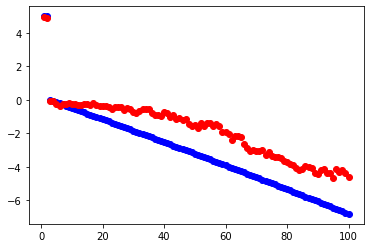

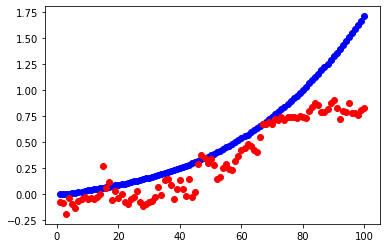

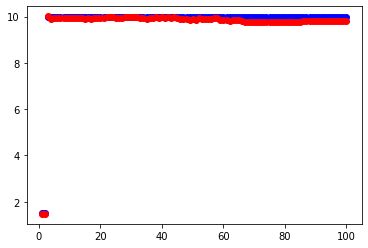

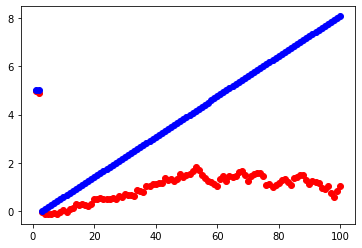

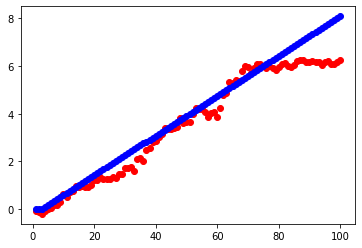

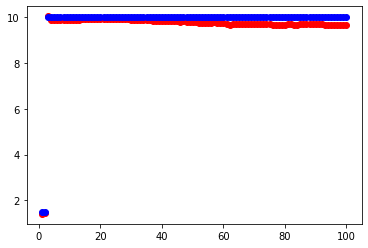

2.4764999695122243 5.545166576877237 9.83
-1.8089715338498353 1.9089715338498354 9.83


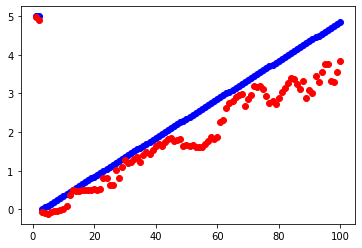

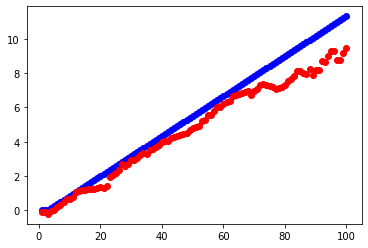

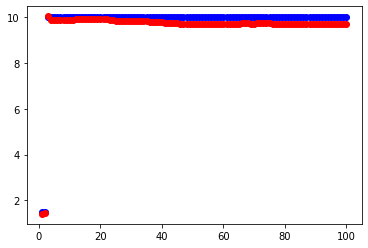

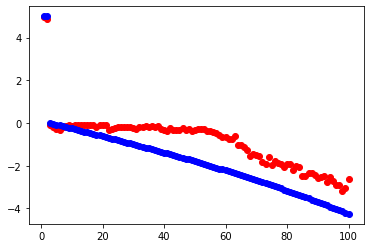

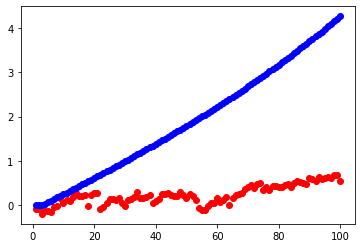

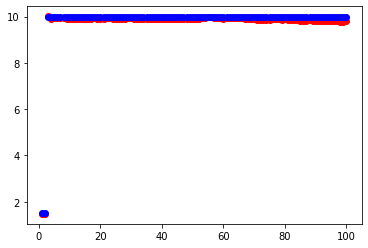

4.060833254233002 4.096075463294983 9.83
4.060833254233002 0.0 9.83


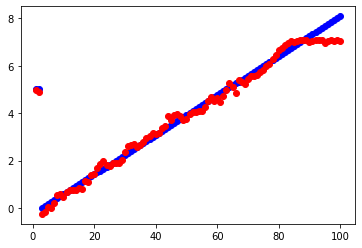

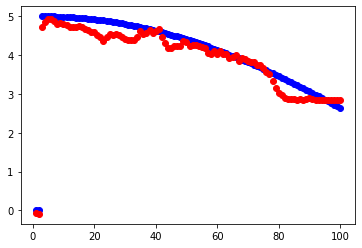

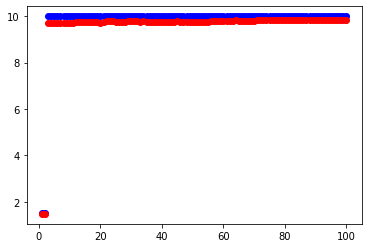

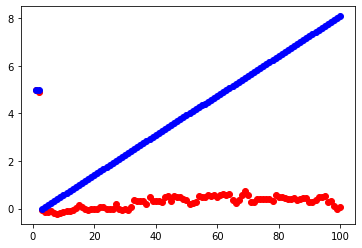

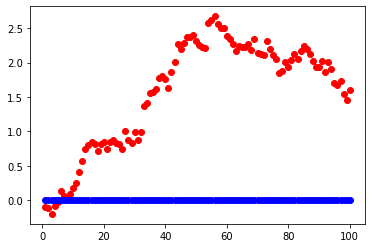

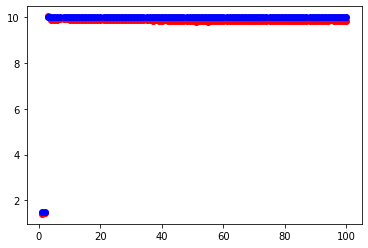

-6.237333257049324 0.0 9.83
2.3798463510349395 4.096075463294983 9.83


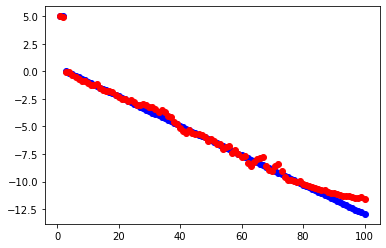

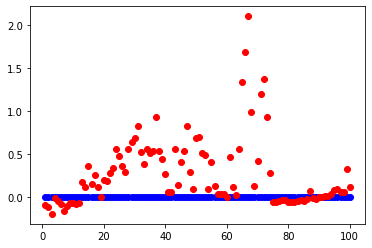

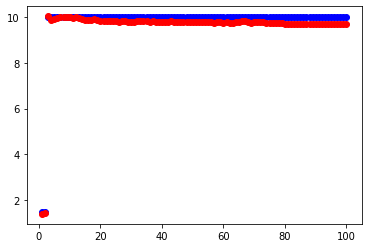

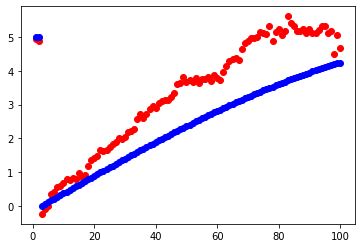

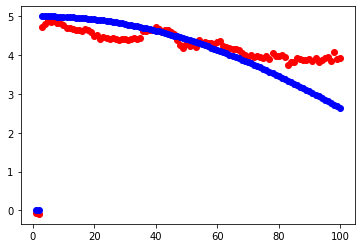

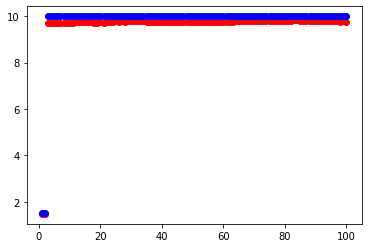

Data from folder 1
(110, 3) (110, 128, 128, 3) Training Shape (110, 3) (110, 128, 128, 3) Validation Shape
(12, 110, 128, 128, 3) (12, 110, 3) (12, 110, 128, 128, 3) (12, 110, 3)
110
Data from folder 2
(110, 3) (110, 128, 128, 3) Training Shape (110, 3) (110, 128, 128, 3) Validation Shape
(12, 110, 128, 128, 3) (12, 110, 3) (12, 110, 128, 128, 3) (12, 110, 3)
110
Data from folder 3
(110, 3) (110, 128, 128, 3) Training Shape (110, 3) (110, 128, 128, 3) Validation Shape
(12, 110, 128, 128, 3) (12, 110, 3) (12, 110, 128, 128, 3) (12, 110, 3)
110
Data from folder 4
(110, 3) (110, 128, 128, 3) Training Shape (110, 3) (110, 128, 128, 3) Validation Shape
(12, 110, 128, 128, 3) (12, 110, 3) (12, 110, 128, 128, 3) (12, 110, 3)
110
Data from folder 5
(110, 3) (110, 128, 128, 3) Training Shape (110, 3) (110, 128, 128, 3) Validation Shape
(12, 110, 128, 128, 3) (12, 110, 3) (12, 110, 128, 128, 3) (12, 110, 3)
110
Data from folder 6
(110, 3) (110, 128, 128, 3) Training Shape (110, 3) (110, 128, 128

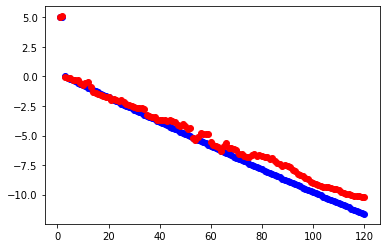

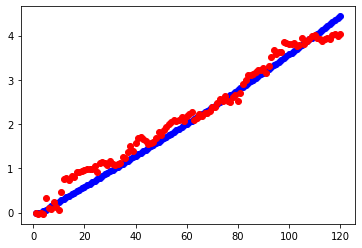

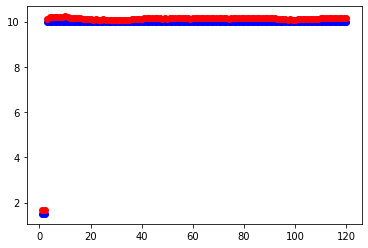

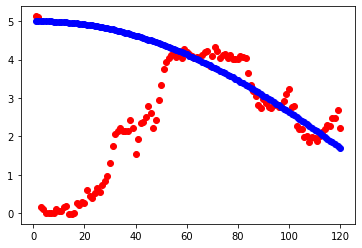

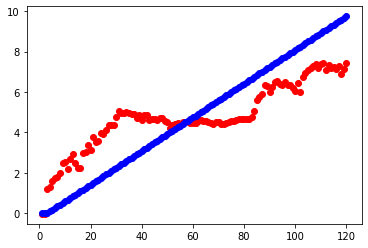

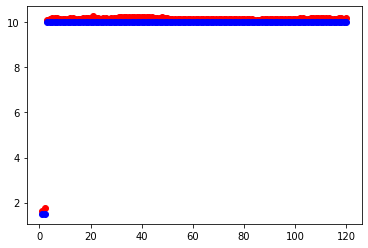

-0.9842597689586811 -1.0967712228679376 30.0
4.854513786857327 1.184344117816848 9.858333333333333


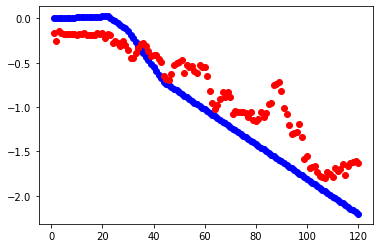

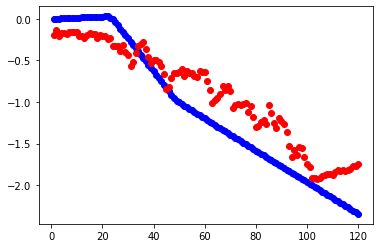

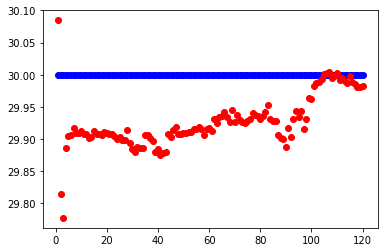

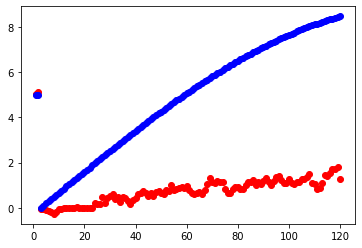

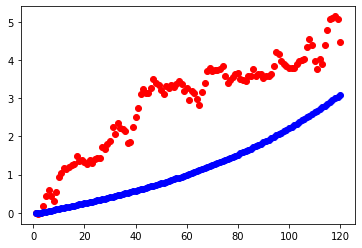

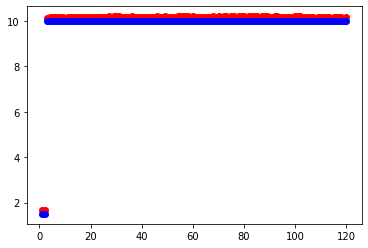

0.09019909129386648 -1.7821392049917355 30.0
0.12562478474781036 -2.592175292850008 30.0


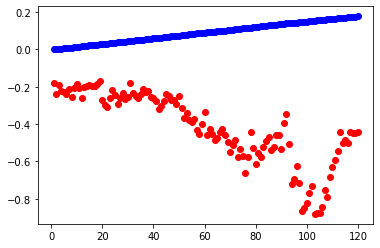

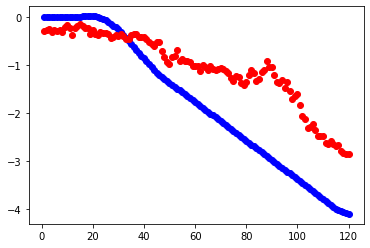

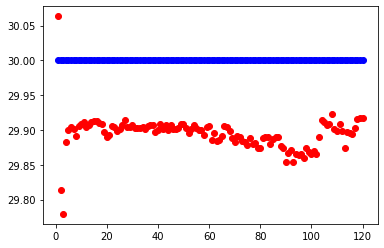

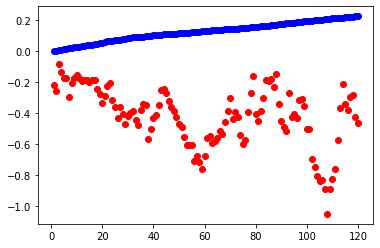

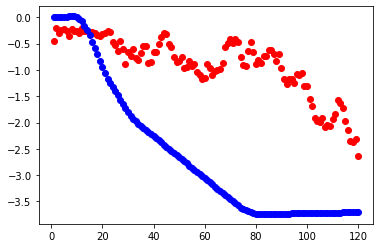

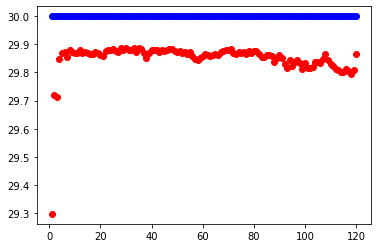

1.095096433876703 5.058815495111048 9.858333333333333
0.12562478474781036 -2.592175292850008 30.0


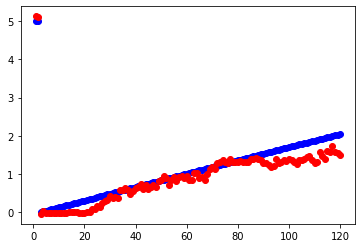

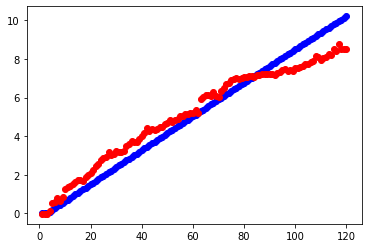

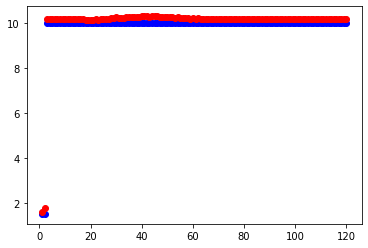

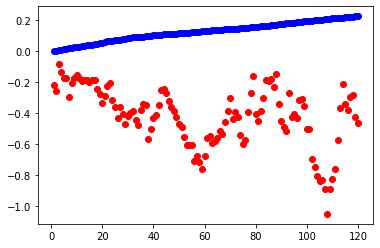

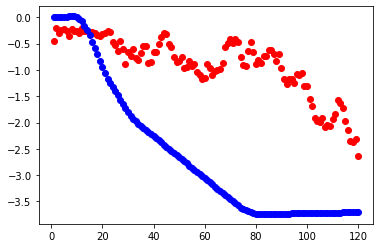

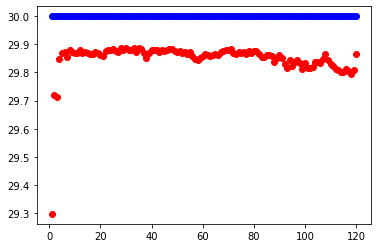

0.08333333333333333 4.793749936732153 9.858333333333333
0.08333333333333333 4.793749936732153 9.858333333333333


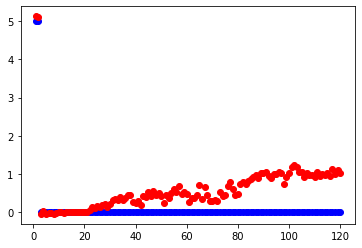

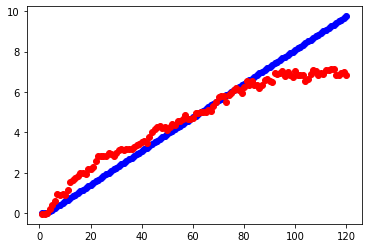

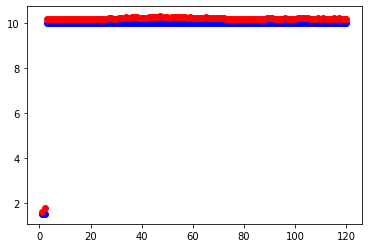

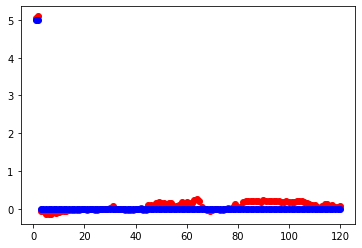

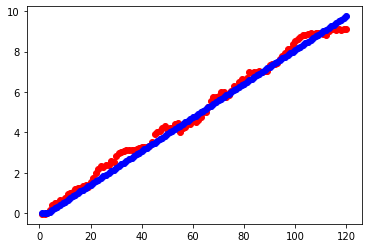

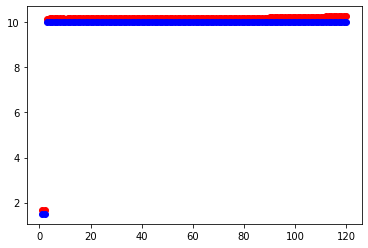

0.08333333333333333 4.793749936732153 9.858333333333333
0.08333333333333333 4.793749936732153 9.858333333333333


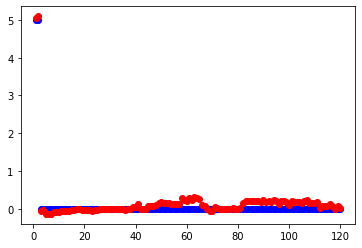

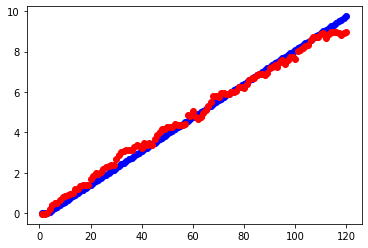

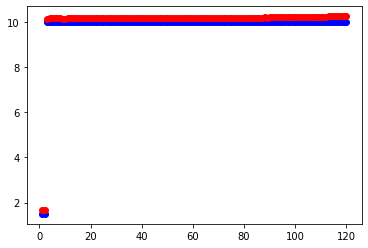

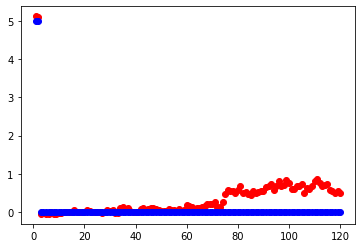

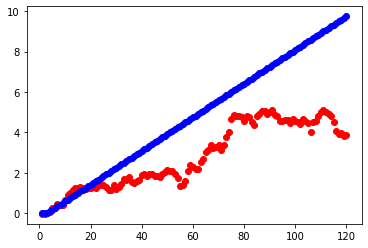

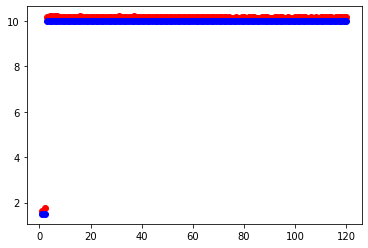

0.23222144840207573 4.793749936732153 9.858333333333333
0.08333333333333333 4.793749936732153 9.858333333333333


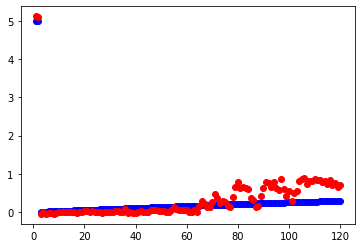

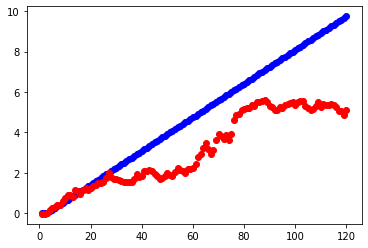

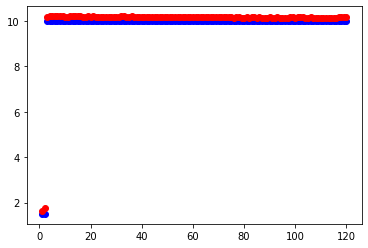

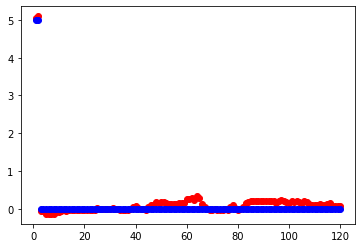

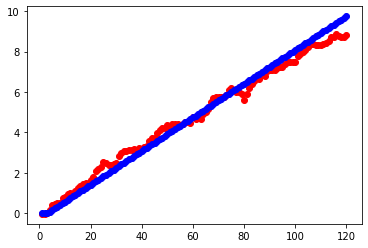

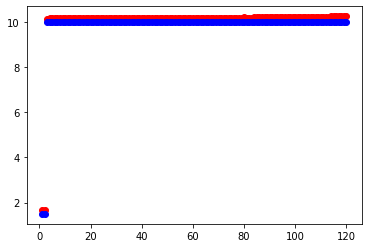

0.08333333333333333 4.793749936732153 9.858333333333333
5.672279993693034 8.769733641172449 9.858333333333333


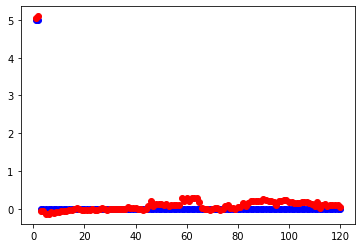

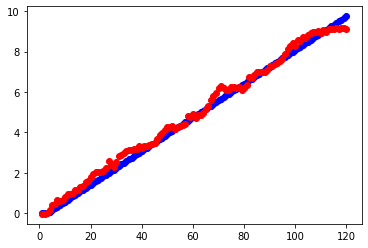

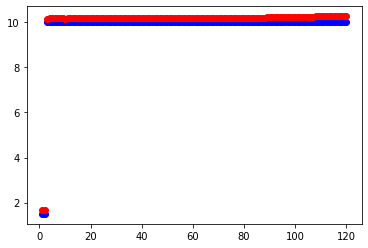

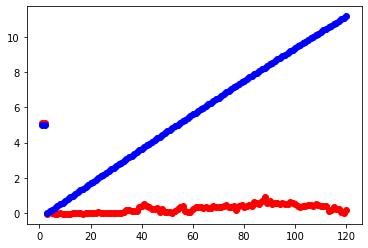

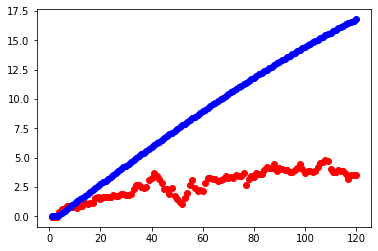

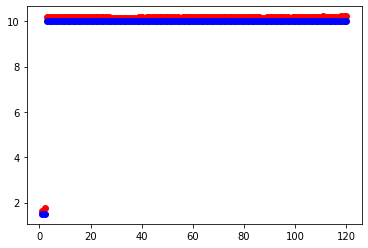

-3.9152198433876038 0.8177662015659735 9.858333333333333
4.877083270065486 4.793749936732153 9.858333333333333


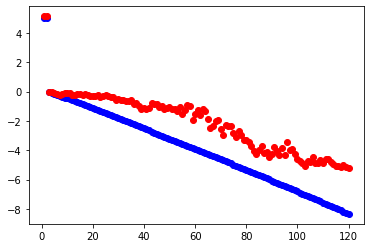

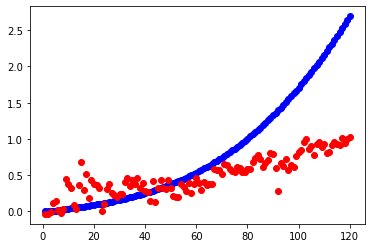

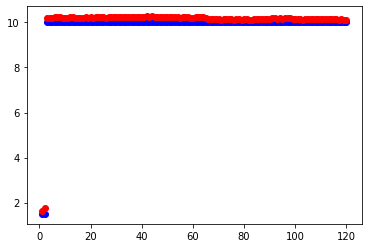

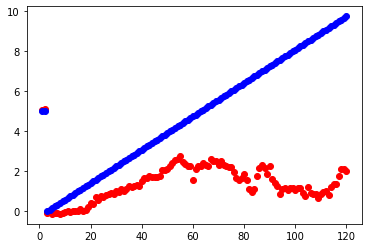

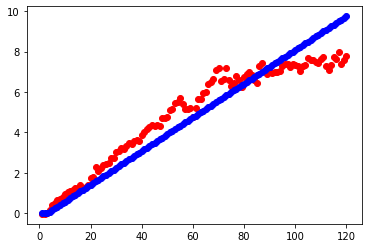

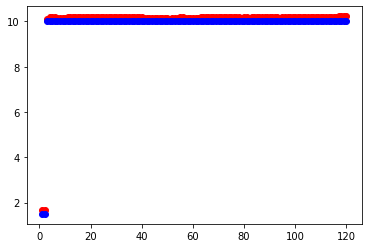

2.9595832960059245 6.7112498907372355 9.858333333333333
-2.3248263200744987 2.408159653407832 9.858333333333333


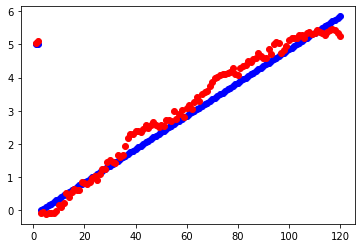

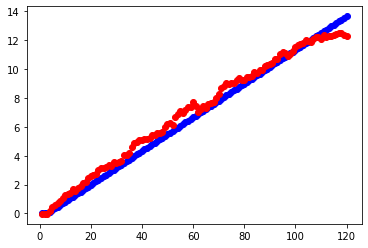

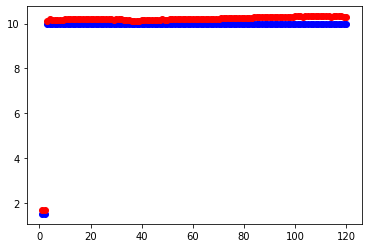

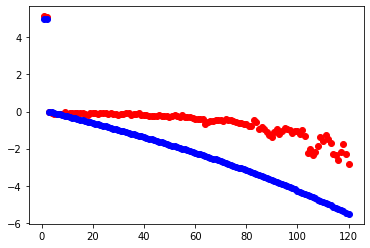

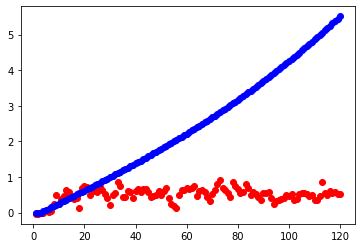

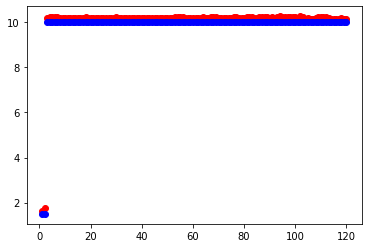

4.877083270065486 3.771501757701238 9.858333333333333
4.877083270065486 0.0 9.858333333333333


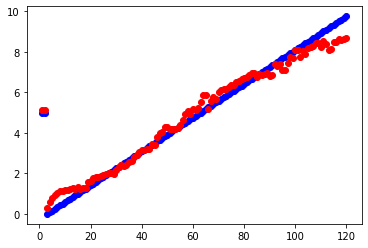

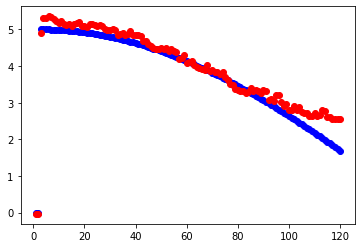

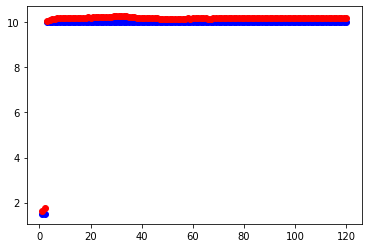

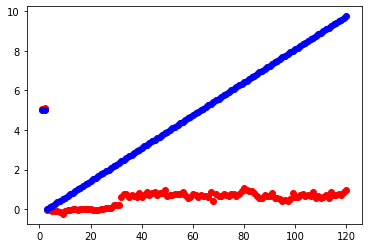

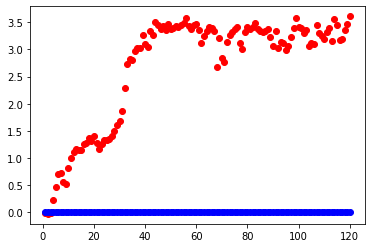

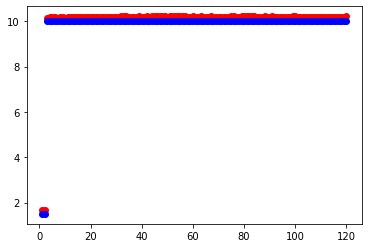

-7.586666534220179 0.0 9.858333333333333
2.733989169107129 3.771501757701238 9.858333333333333


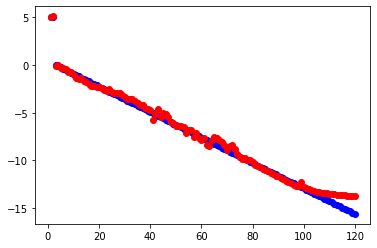

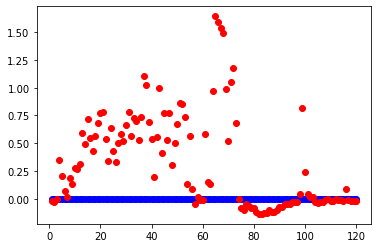

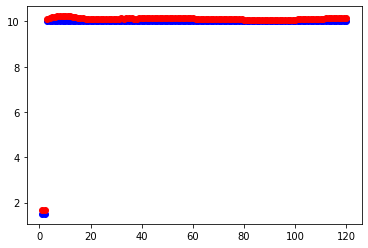

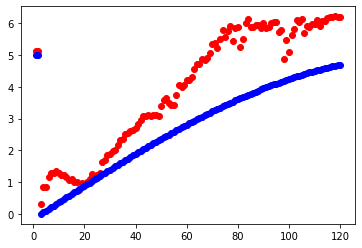

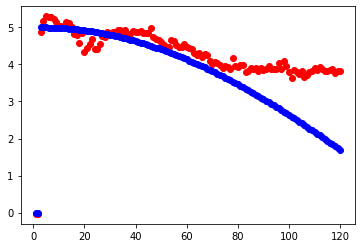

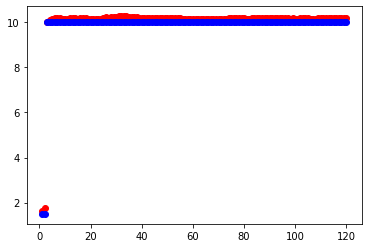

Data from folder 1
(130, 3) (130, 128, 128, 3) Training Shape (130, 3) (130, 128, 128, 3) Validation Shape
(12, 130, 128, 128, 3) (12, 130, 3) (12, 130, 128, 128, 3) (12, 130, 3)
130
Data from folder 2
(130, 3) (130, 128, 128, 3) Training Shape (130, 3) (130, 128, 128, 3) Validation Shape
(12, 130, 128, 128, 3) (12, 130, 3) (12, 130, 128, 128, 3) (12, 130, 3)
130
Data from folder 3
(130, 3) (130, 128, 128, 3) Training Shape (130, 3) (130, 128, 128, 3) Validation Shape
(12, 130, 128, 128, 3) (12, 130, 3) (12, 130, 128, 128, 3) (12, 130, 3)
130
Data from folder 4
(130, 3) (130, 128, 128, 3) Training Shape (130, 3) (130, 128, 128, 3) Validation Shape
(12, 130, 128, 128, 3) (12, 130, 3) (12, 130, 128, 128, 3) (12, 130, 3)
130
Data from folder 5
(130, 3) (130, 128, 128, 3) Training Shape (130, 3) (130, 128, 128, 3) Validation Shape
(12, 130, 128, 128, 3) (12, 130, 3) (12, 130, 128, 128, 3) (12, 130, 3)
130
Data from folder 6
(130, 3) (130, 128, 128, 3) Training Shape (130, 3) (130, 128, 128

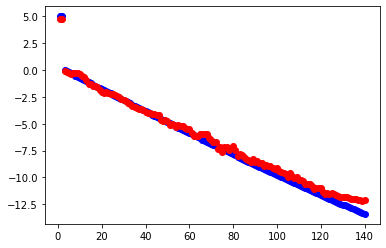

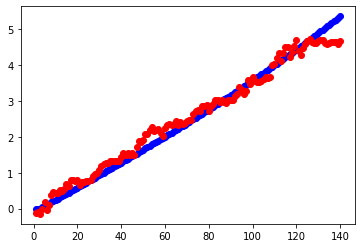

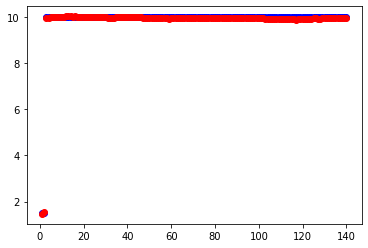

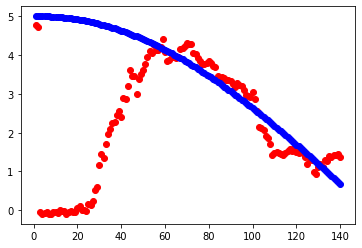

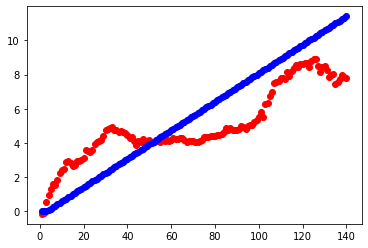

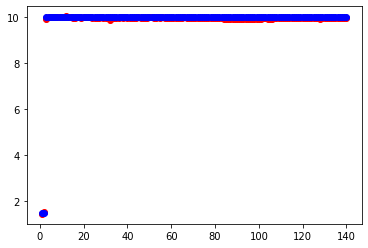

-1.1736369963098636 -1.2989333894732702 30.0
5.408923699706793 1.5361534263206909 9.878571428571428


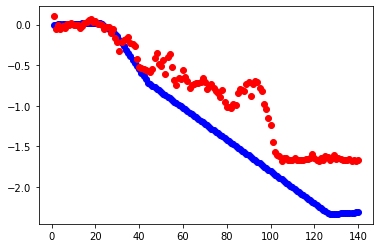

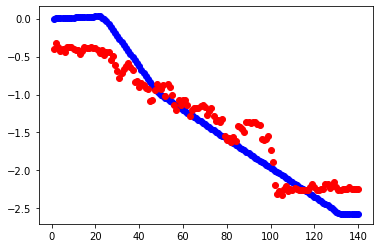

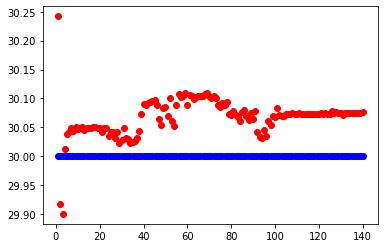

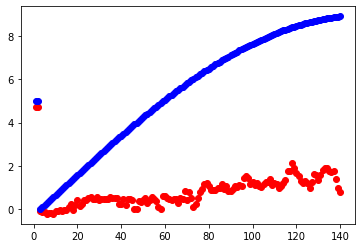

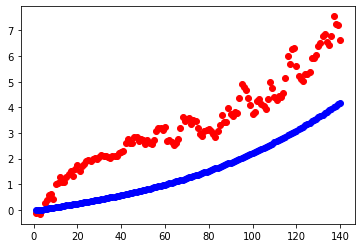

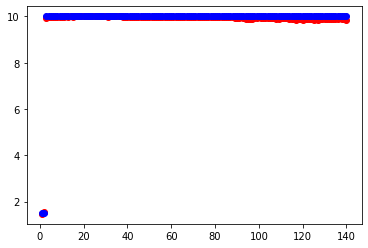

0.10567578641593818 -2.114191004184618 30.0
0.14148699501312872 -2.748987954143329 30.0


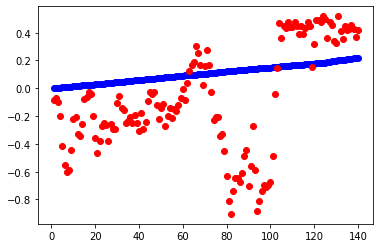

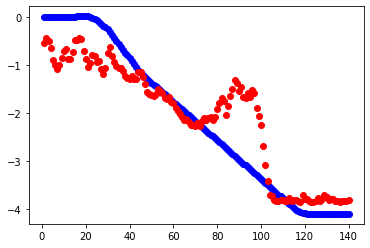

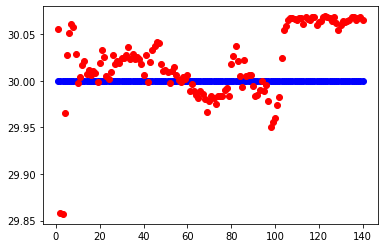

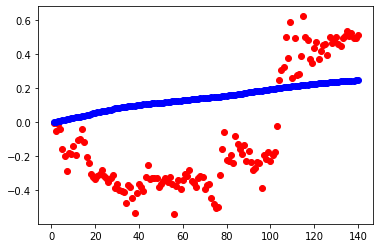

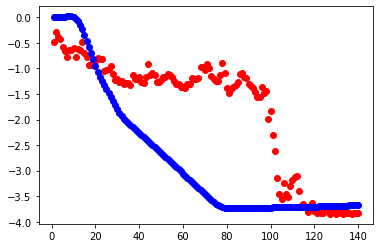

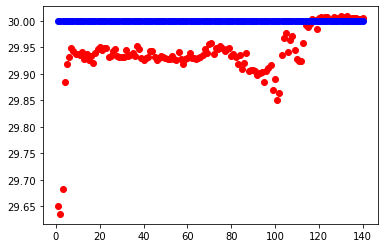

1.2560912036203913 5.923313127192003 9.878571428571428
0.14148699501312872 -2.748987954143329 30.0


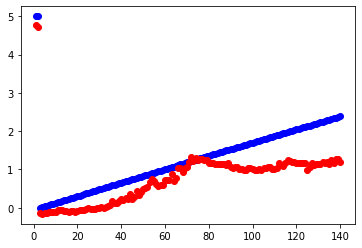

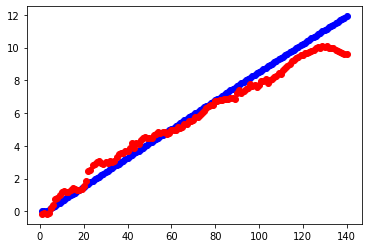

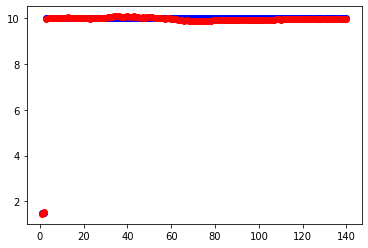

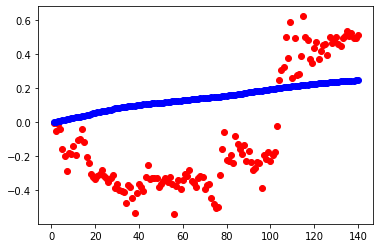

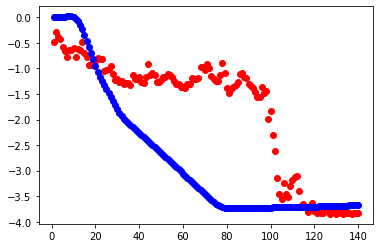

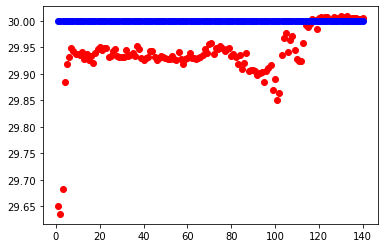

0.07142857142857142 5.626785625996334 9.878571428571428
0.07142857142857142 5.626785625996334 9.878571428571428


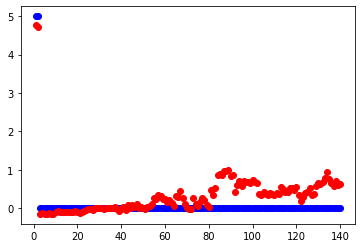

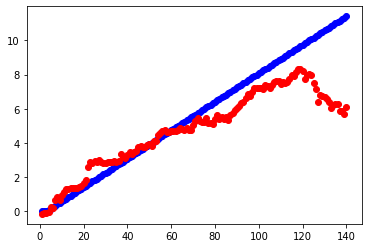

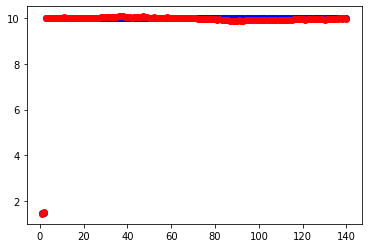

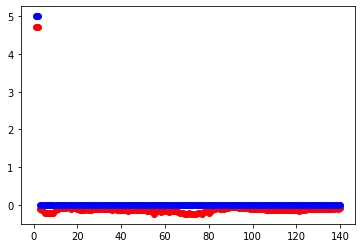

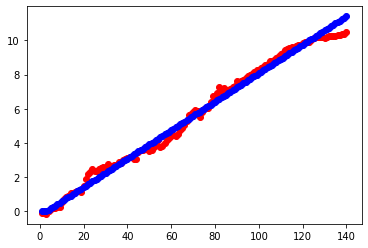

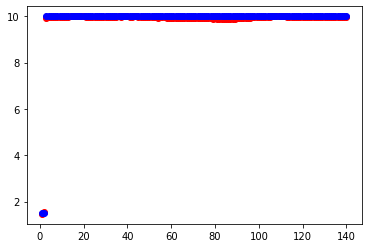

0.07142857142857142 5.626785625996334 9.878571428571428
0.07142857142857142 5.626785625996334 9.878571428571428


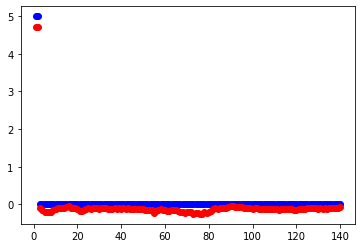

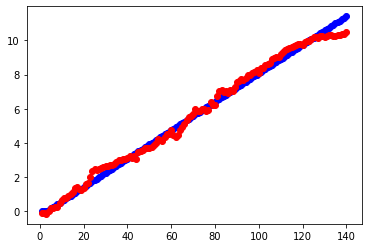

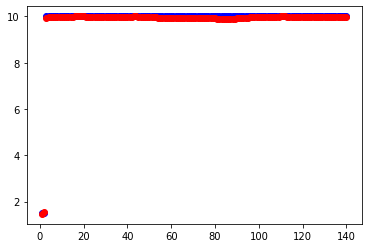

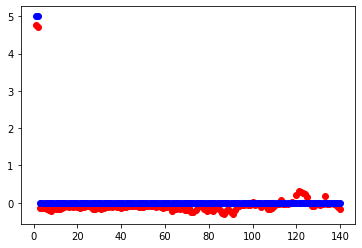

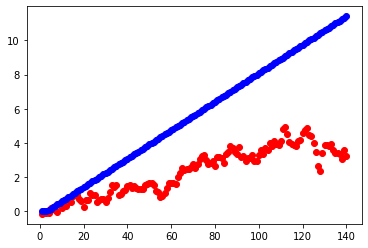

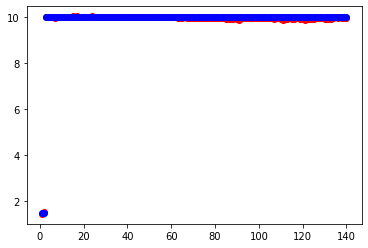

0.24326978579629213 5.626785625996334 9.878571428571428
0.07142857142857142 5.626785625996334 9.878571428571428


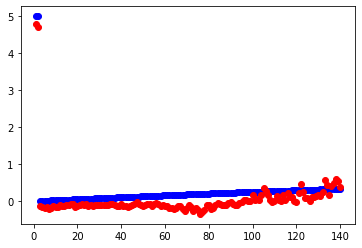

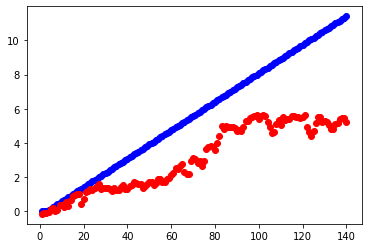

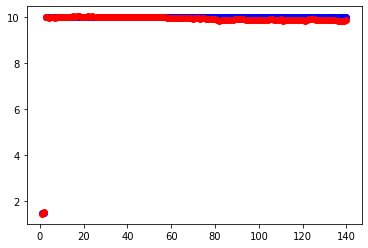

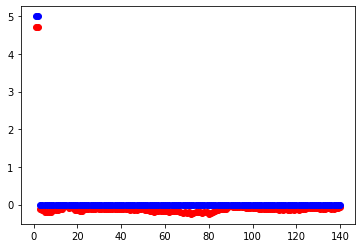

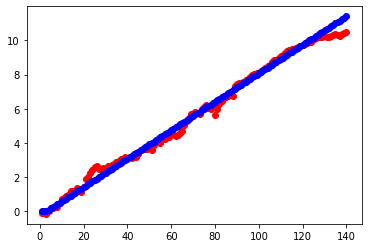

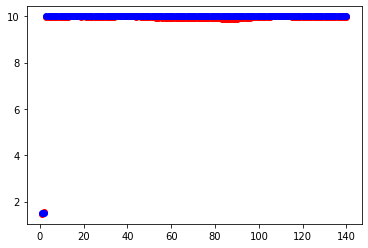

0.07142857142857142 5.626785625996334 9.878571428571428
6.587796674455915 10.074698248612028 9.878571428571428


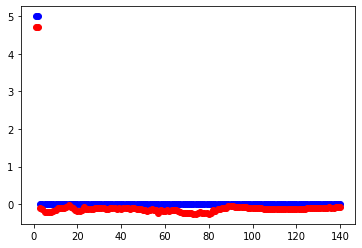

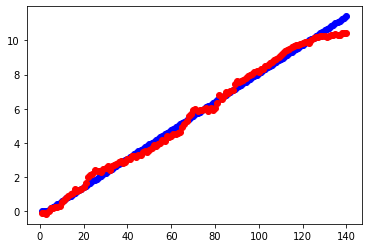

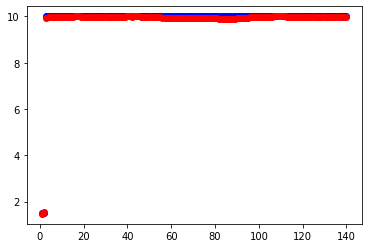

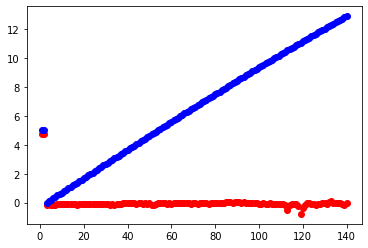

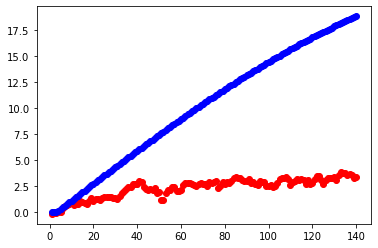

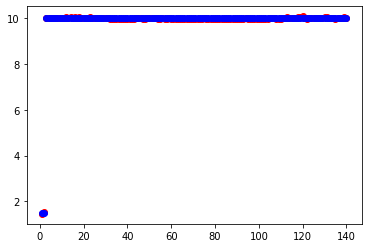

-4.665774539538792 1.1788730298368526 9.878571428571428
5.698214197424906 5.626785625996334 9.878571428571428


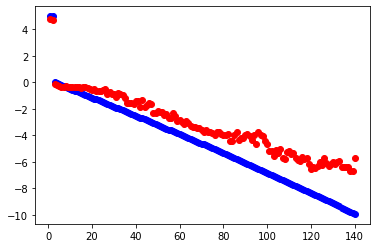

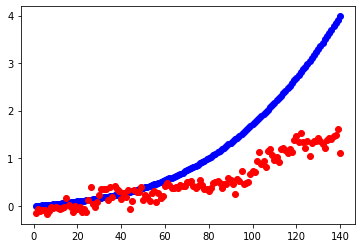

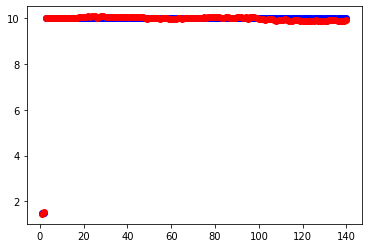

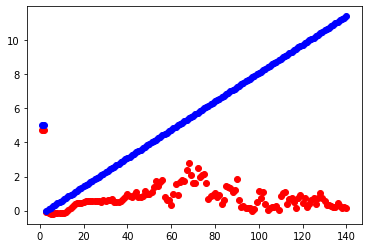

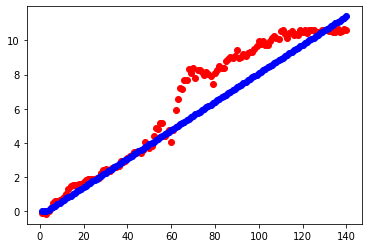

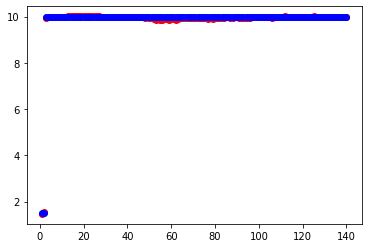

3.447499947569201 7.877499858662486 9.878571428571428
-2.886609458976558 2.9580380304051297 9.878571428571428


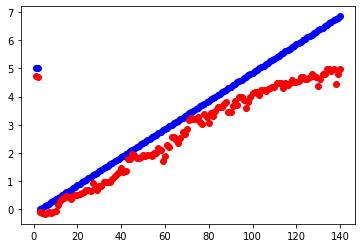

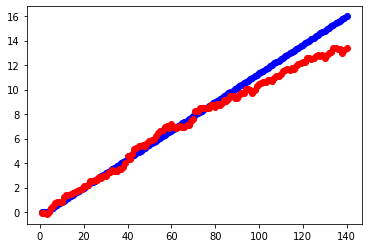

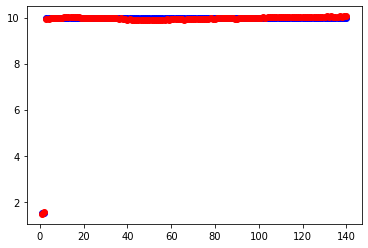

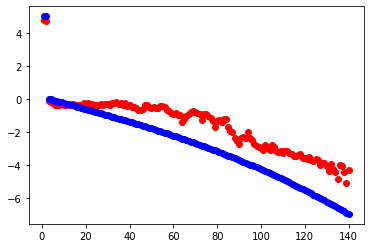

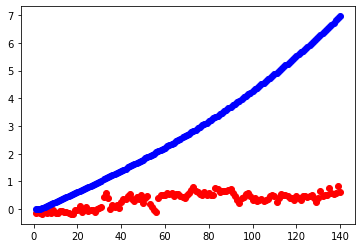

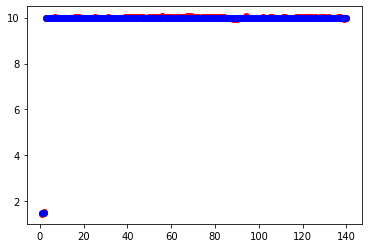

5.698214197424906 3.3991586421217237 9.878571428571428
5.698214197424906 0.0 9.878571428571428


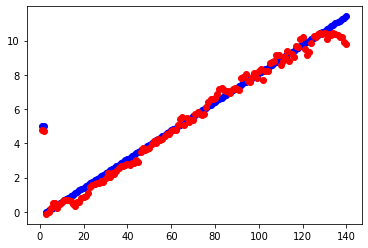

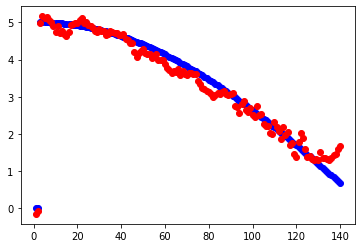

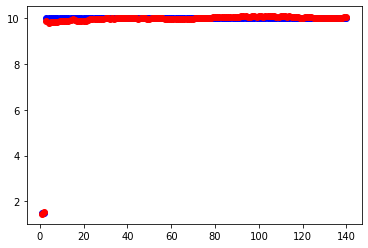

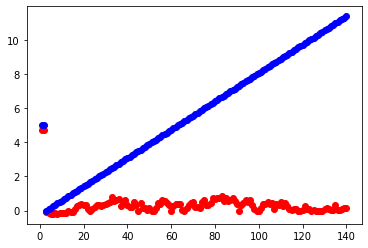

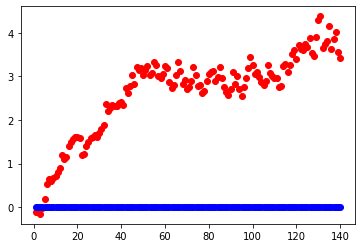

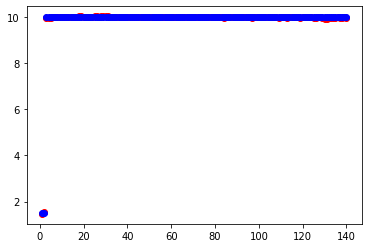

-8.931428451091051 0.0 9.878571428571428
3.036703646103186 3.3991586421217237 9.878571428571428


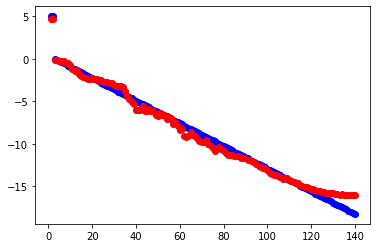

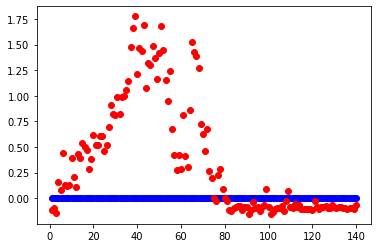

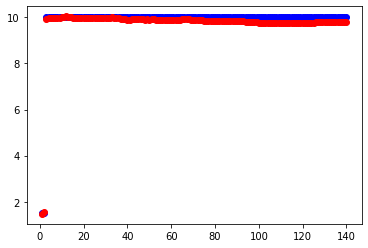

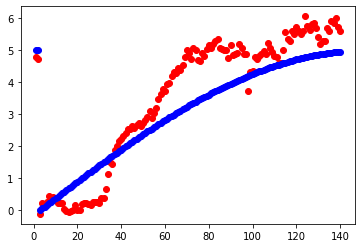

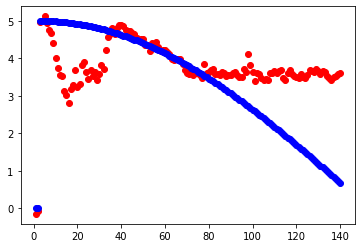

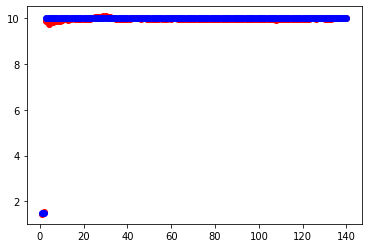

Data from folder 1
(150, 3) (150, 128, 128, 3) Training Shape (150, 3) (150, 128, 128, 3) Validation Shape
(12, 150, 128, 128, 3) (12, 150, 3) (12, 150, 128, 128, 3) (12, 150, 3)
150
Data from folder 2
(150, 3) (150, 128, 128, 3) Training Shape (150, 3) (150, 128, 128, 3) Validation Shape
(12, 150, 128, 128, 3) (12, 150, 3) (12, 150, 128, 128, 3) (12, 150, 3)
150
Data from folder 3
(150, 3) (150, 128, 128, 3) Training Shape (150, 3) (150, 128, 128, 3) Validation Shape
(12, 150, 128, 128, 3) (12, 150, 3) (12, 150, 128, 128, 3) (12, 150, 3)
150
Data from folder 4
(150, 3) (150, 128, 128, 3) Training Shape (150, 3) (150, 128, 128, 3) Validation Shape
(12, 150, 128, 128, 3) (12, 150, 3) (12, 150, 128, 128, 3) (12, 150, 3)
150
Data from folder 5
(150, 3) (150, 128, 128, 3) Training Shape (150, 3) (150, 128, 128, 3) Validation Shape
(12, 150, 128, 128, 3) (12, 150, 3) (12, 150, 128, 128, 3) (12, 150, 3)
150
Data from folder 6
(150, 3) (150, 128, 128, 3) Training Shape (150, 3) (150, 128, 128

In [ ]:
def get_X(i, count2) :
  X = np.zeros((count2,imgsize1,imgsize2,3))
  if i == 2 or i == 3 or i == 15 or i == 16 :
    vidcap = cv2.VideoCapture('gdrive/My Drive/FYP-Data/Scenes Videos/{}/Basic _FirstMP4.avi'.format(i))
  else :
    vidcap = cv2.VideoCapture('gdrive/My Drive/FYP-Data/Scenes Videos/{}/Basic _FirstMP4.mp4'.format(i))
  count = 0
  while count<count2 :  
    success, image = vidcap.read()
    img = cv2.resize(image, (imgsize2,imgsize1))
    X[count,:,:,:] = np.copy(img)
    count += 1
  return X
def data_loader(i, n) :
  count2 = n
  X_train = get_X(i, count2)
  X_val = get_X(i+12, count2)
  Y_train = np.zeros((count2, 3))
  Y_val = np.zeros((count2, 3))
  Y_train[:,:] = np.array(pd.read_excel('gdrive/My Drive/FYP-Data/Scene Pos/{}/PositionData.xlsx'.format(i))).T[0:count2,:]
  Y_val[:,:] = np.array(pd.read_excel('gdrive/My Drive/FYP-Data/Scene Pos/{}/PositionData.xlsx'.format(i+12))).T[0:count2,:]
  print(Y_train.shape, X_train.shape, "Training Shape", Y_val.shape, X_val.shape, "Validation Shape")
  return Y_train, Y_val, X_train, X_val
for n in range(150, 250, 10) :
  X_train = np.zeros((12, n, imgsize1, imgsize2, 3))
  X_val = np.zeros((12, n, imgsize1, imgsize2, 3))
  Y_train = np.zeros((12, n, 3))
  Y_val = np.zeros((12, n, 3))
  for i in range(1,13) :
    print("Data from folder", i)
    Y_t, Y_v, X_t, X_v = data_loader(i, n)
    X_train[i-1, :, :, :] = np.copy(X_t)
    Y_train[i-1, :, :] = np.copy(Y_t)
    X_val[i-1, :, :, :] = np.copy(X_v)
    Y_val[i-1, :, :] = np.copy(Y_v)
    print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)
    print(n)
    if i == 12 :
      model.load_weights('gdrive/My Drive/FYP-Data/Model_weights_temp_11_mobilenet')
      history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size=1, epochs=50)
      model.save_weights('gdrive/My Drive/FYP-Data/Model_weights_temp_11_mobilenet')
      Y_pred = model.predict(X_train)
      Y_pred_val = model.predict(X_val);
      print(R_Square(Y_train[:, :, 0:2], Y_pred[:, :, 0:2]), R_Square(Y_val[:, :, 0:2], Y_pred_val[:, :, 0:2]), 'R_square')
      print(RMSE(Y_train[:, :, 0:2], Y_pred[:, :, 0:2]), RMSE(Y_val[:, :, 0:2], Y_pred_val[:, :, 0:2]), 'RMSE')
      print(RMSEDrift(Y_train[:, :, 0:2], Y_pred[:, :, 0:2]), RMSEDrift(Y_val[:, :, 0:2], Y_pred_val[:, :, 0:2]), 'RMSEDrift')
      print(R_Square(Y_train, Y_pred), R_Square(Y_val, Y_pred_val), 'R_square_full')
      print(RMSE(Y_train, Y_pred), RMSE(Y_val, Y_pred_val), 'RMSE_full')
      print(RMSEDrift(Y_train, Y_pred), RMSEDrift(Y_val, Y_pred_val), 'RMSEDrift_full')
      for i in [0.01, 0.05, 0.1, 0.5, 1, 5, 10] :
        print(np.sum(np.abs(np.abs(Y_train[:, :, 0:2]) - np.abs(Y_pred[:, :, 0:2])) < i)/(Y_train.shape[0]*Y_train.shape[1]*2), "For {} training".format(i))
        print(np.sum(np.abs(np.abs(Y_val[:, :, 0:2]) - np.abs(Y_pred_val[:, :, 0:2])) < i)/(Y_val.shape[0]*Y_val.shape[1]*2), "For {} validation".format(i))
      if n%20 == 0 :
        for i in range(0,12) :
          X_axis = range(1,n+1)
          print(np.mean(Y_train[i,:,1]), np.mean(Y_train[i,:,0]), np.mean(Y_train[i,:,2]))
          print(np.mean(Y_val[i,:,1]), np.mean(Y_val[i,:,0]), np.mean(Y_val[i,:,2]))
          plt.scatter(X_axis, Y_train[i,:,1], c ="blue")
          plt.scatter(X_axis, Y_pred[i,:,1], c ="red")
          plt.show()
          plt.scatter(X_axis, Y_train[i,:,0], c ="blue")
          plt.scatter(X_axis, Y_pred[i,:,0], c ="red")
          plt.show()
          plt.scatter(X_axis, Y_train[i,:,2], c ="blue")
          plt.scatter(X_axis, Y_pred[i,:,2], c ="red")
          plt.show()
          X_axis = range(1,n+1)
          plt.scatter(X_axis, Y_pred_val[i,:,1], c ="red")
          plt.scatter(X_axis, Y_val[i,:,1], c ="blue")
          plt.show()
          plt.scatter(X_axis, Y_pred_val[i,:,0], c ="red")
          plt.scatter(X_axis, Y_val[i,:,0], c ="blue")
          plt.show()
          plt.scatter(X_axis, Y_pred_val[i,:,2], c ="red")
          plt.scatter(X_axis, Y_val[i,:,2], c ="blue")
          plt.show()   

Data from folder 1
(140, 3) (140, 128, 128, 3) Training Shape (140, 3) (140, 128, 128, 3) Validation Shape
(12, 140, 128, 128, 3) (12, 140, 3) (12, 140, 128, 128, 3) (12, 140, 3)
140
Data from folder 2
(140, 3) (140, 128, 128, 3) Training Shape (140, 3) (140, 128, 128, 3) Validation Shape
(12, 140, 128, 128, 3) (12, 140, 3) (12, 140, 128, 128, 3) (12, 140, 3)
140
Data from folder 3
(140, 3) (140, 128, 128, 3) Training Shape (140, 3) (140, 128, 128, 3) Validation Shape
(12, 140, 128, 128, 3) (12, 140, 3) (12, 140, 128, 128, 3) (12, 140, 3)
140
Data from folder 4
(140, 3) (140, 128, 128, 3) Training Shape (140, 3) (140, 128, 128, 3) Validation Shape
(12, 140, 128, 128, 3) (12, 140, 3) (12, 140, 128, 128, 3) (12, 140, 3)
140
Data from folder 5
(140, 3) (140, 128, 128, 3) Training Shape (140, 3) (140, 128, 128, 3) Validation Shape
(12, 140, 128, 128, 3) (12, 140, 3) (12, 140, 128, 128, 3) (12, 140, 3)
140
Data from folder 6
(140, 3) (140, 128, 128, 3) Training Shape (140, 3) (140, 128, 128

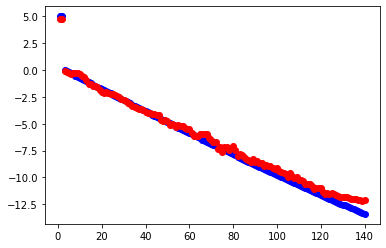

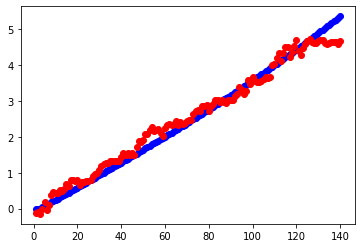

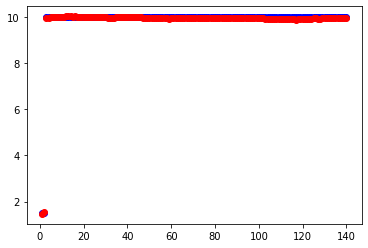

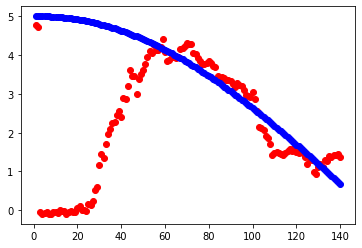

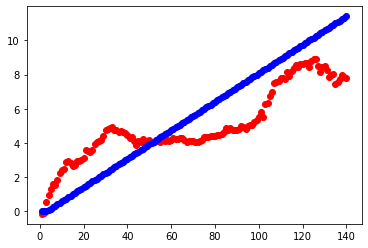

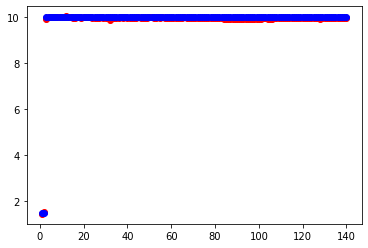

-1.1736369963098636 -1.2989333894732702 30.0
5.408923699706793 1.5361534263206909 9.878571428571428


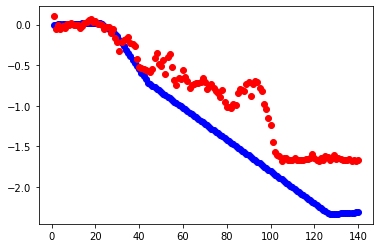

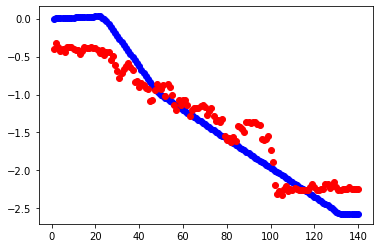

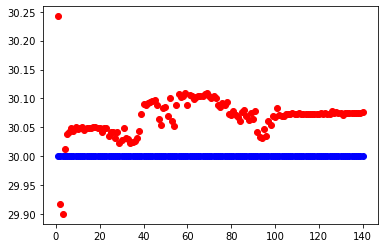

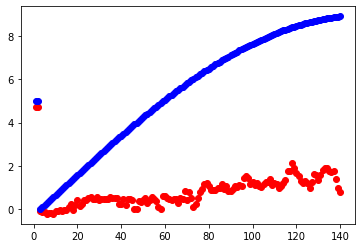

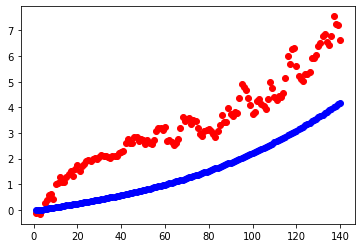

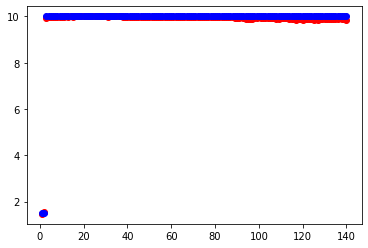

0.10567578641593818 -2.114191004184618 30.0
0.14148699501312872 -2.748987954143329 30.0


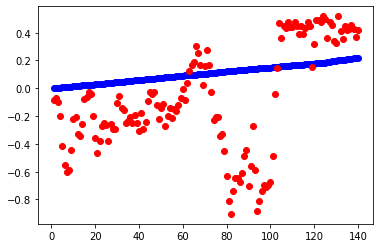

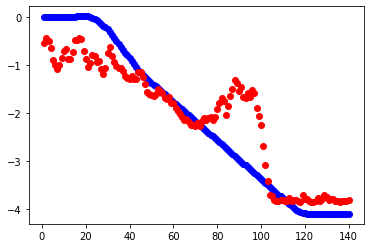

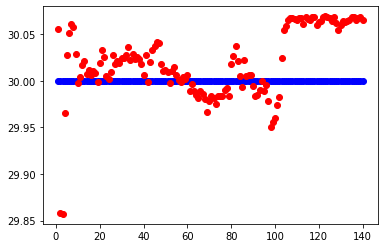

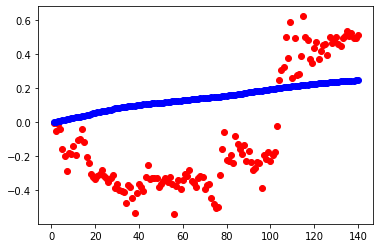

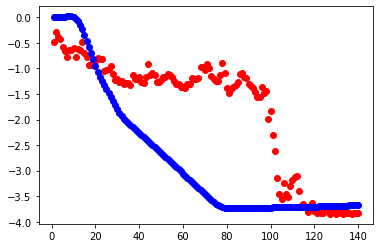

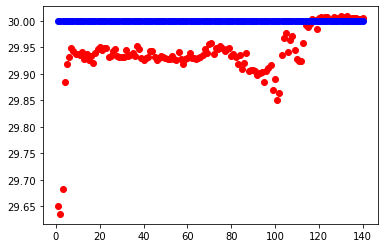

1.2560912036203913 5.923313127192003 9.878571428571428
0.14148699501312872 -2.748987954143329 30.0


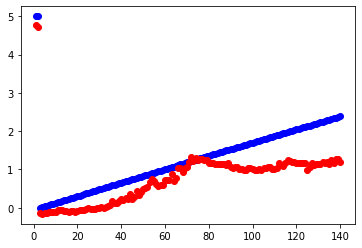

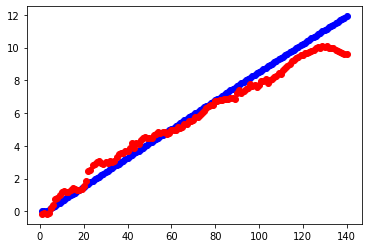

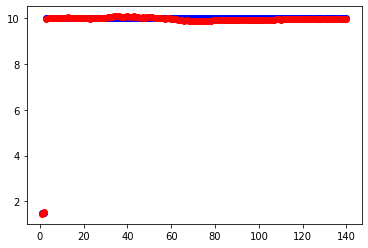

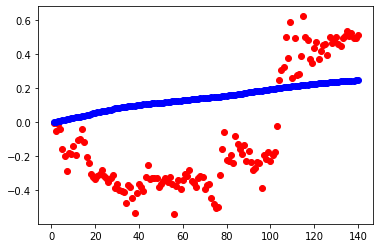

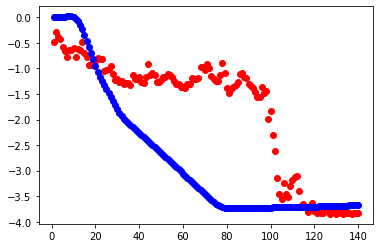

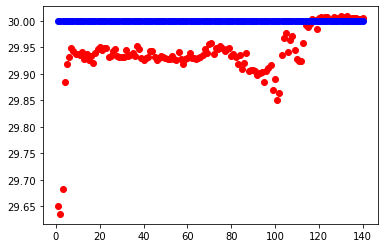

0.07142857142857142 5.626785625996334 9.878571428571428
0.07142857142857142 5.626785625996334 9.878571428571428


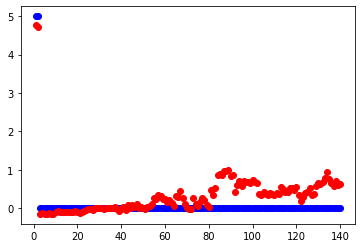

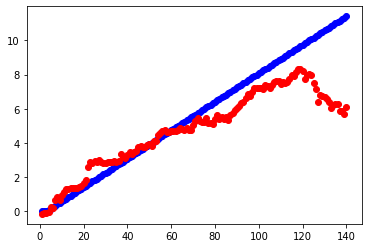

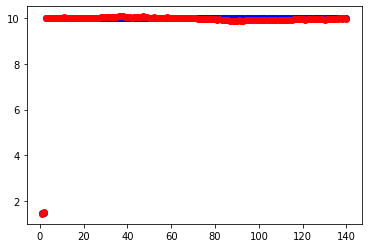

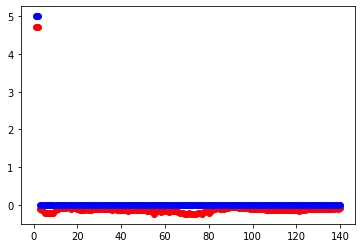

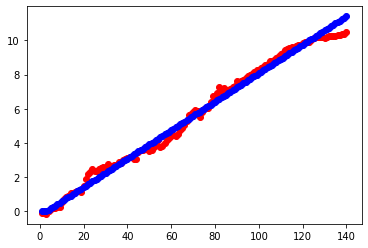

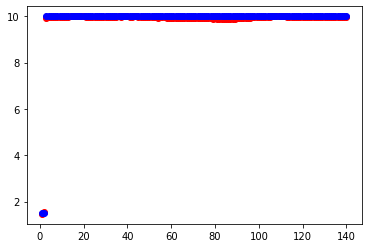

0.07142857142857142 5.626785625996334 9.878571428571428
0.07142857142857142 5.626785625996334 9.878571428571428


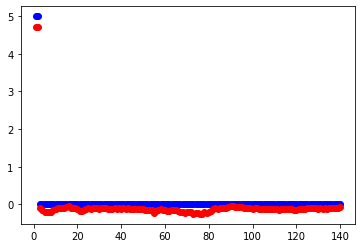

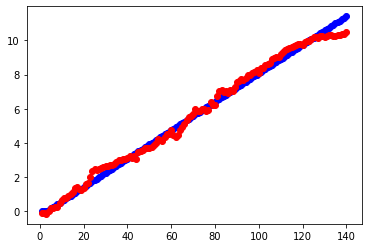

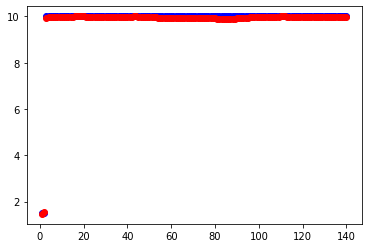

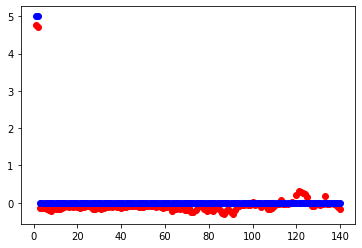

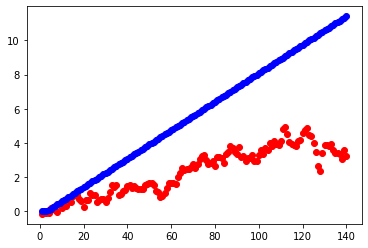

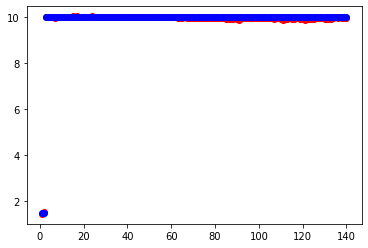

0.24326978579629213 5.626785625996334 9.878571428571428
0.07142857142857142 5.626785625996334 9.878571428571428


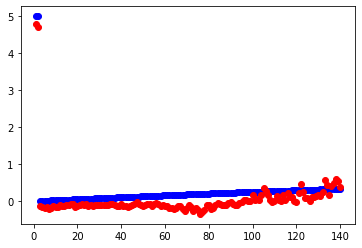

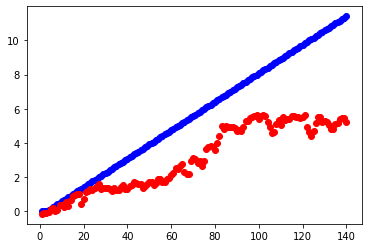

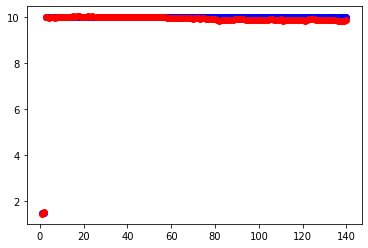

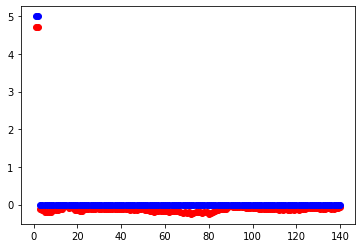

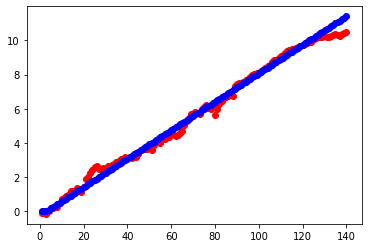

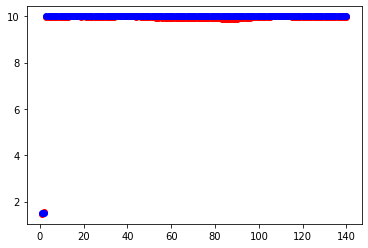

0.07142857142857142 5.626785625996334 9.878571428571428
6.587796674455915 10.074698248612028 9.878571428571428


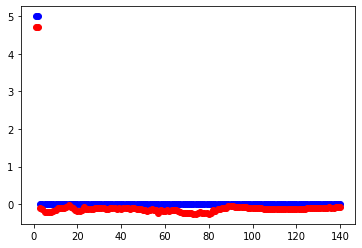

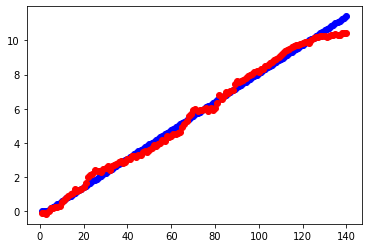

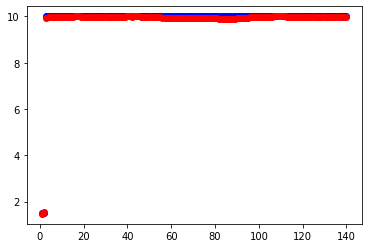

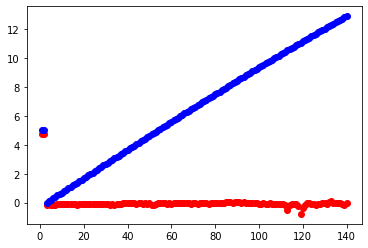

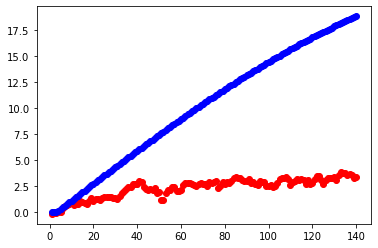

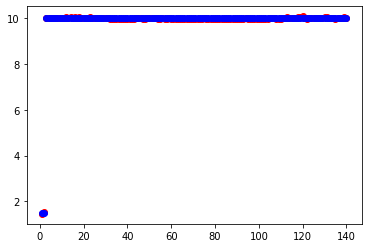

-4.665774539538792 1.1788730298368526 9.878571428571428
5.698214197424906 5.626785625996334 9.878571428571428


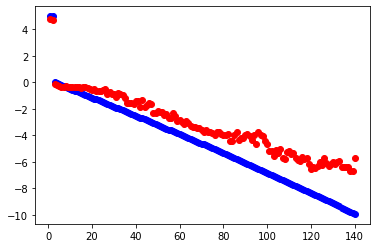

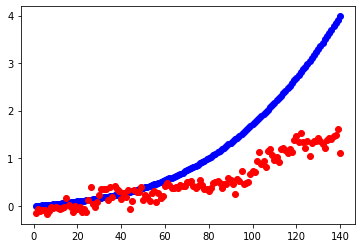

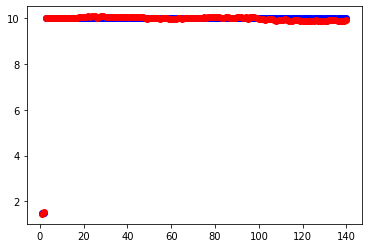

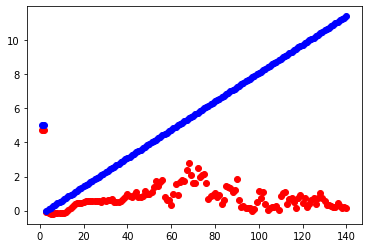

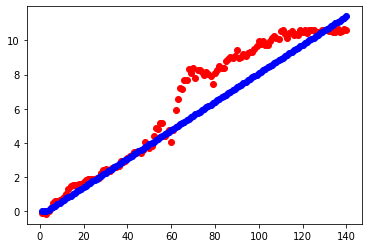

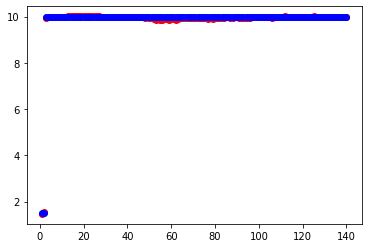

3.447499947569201 7.877499858662486 9.878571428571428
-2.886609458976558 2.9580380304051297 9.878571428571428


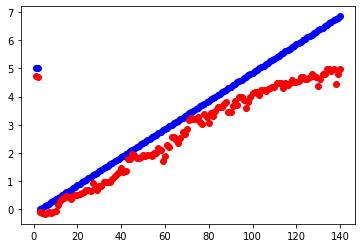

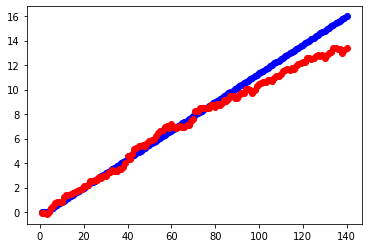

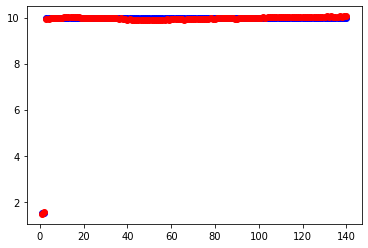

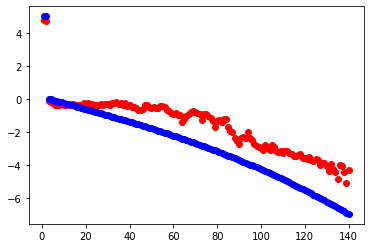

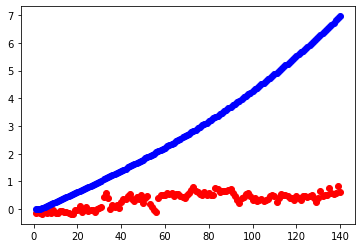

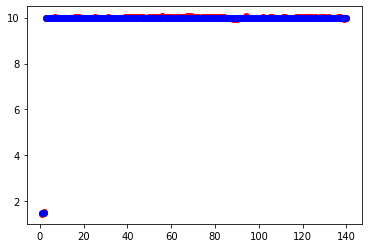

5.698214197424906 3.3991586421217237 9.878571428571428
5.698214197424906 0.0 9.878571428571428


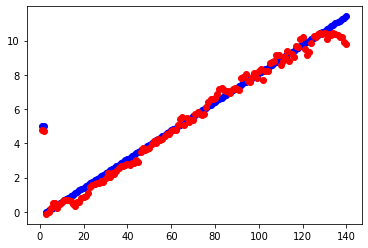

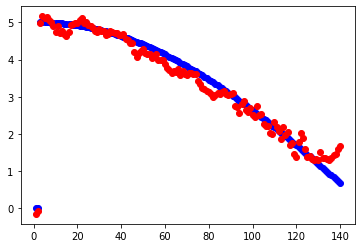

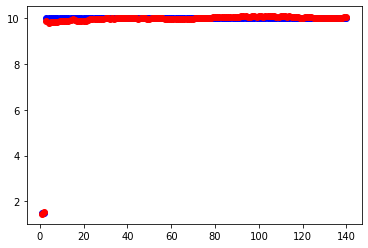

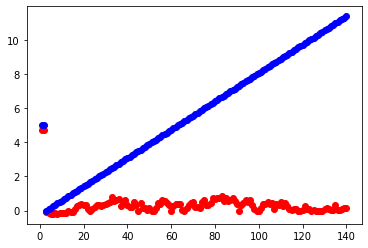

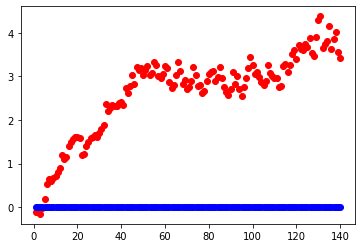

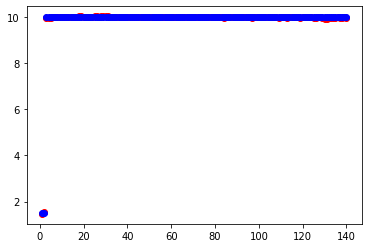

-8.931428451091051 0.0 9.878571428571428
3.036703646103186 3.3991586421217237 9.878571428571428


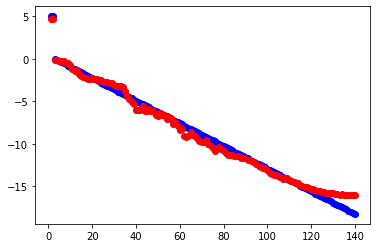

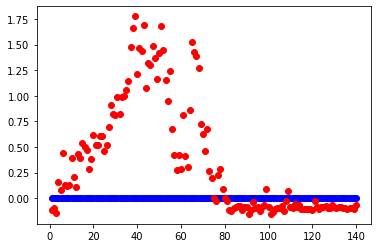

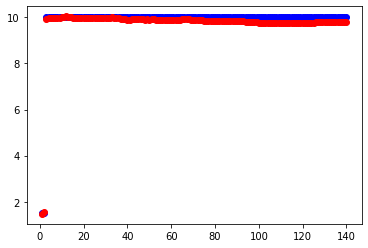

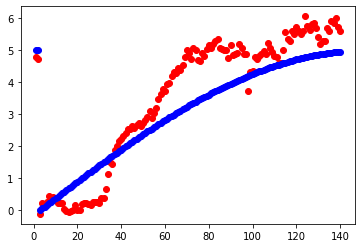

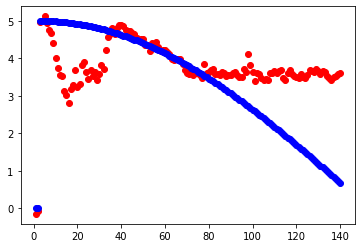

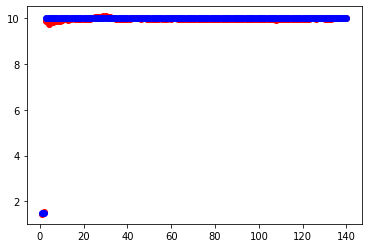

In [ ]:
# For generating X_train and Y_train prediction
def get_X(i, count2) :
  X = np.zeros((count2,imgsize1,imgsize2,3))
  if i == 2 or i == 3 or i == 15 or i == 16 :
    vidcap = cv2.VideoCapture('gdrive/My Drive/FYP-Data/Scenes Videos/{}/Basic _FirstMP4.avi'.format(i))
  else :
    vidcap = cv2.VideoCapture('gdrive/My Drive/FYP-Data/Scenes Videos/{}/Basic _FirstMP4.mp4'.format(i))
  count = 0
  while count<count2 :  
    success, image = vidcap.read()
    img = cv2.resize(image, (imgsize2,imgsize1))
    X[count,:,:,:] = np.copy(img)
    count += 1
  return X
def data_loader(i, n) :
  count2 = n
  X_train = get_X(i, count2)
  X_val = get_X(i+12, count2)
  Y_train = np.zeros((count2, 3))
  Y_val = np.zeros((count2, 3))
  Y_train[:,:] = np.array(pd.read_excel('gdrive/My Drive/FYP-Data/Scene Pos/{}/PositionData.xlsx'.format(i))).T[0:count2,:]
  Y_val[:,:] = np.array(pd.read_excel('gdrive/My Drive/FYP-Data/Scene Pos/{}/PositionData.xlsx'.format(i+12))).T[0:count2,:]
  print(Y_train.shape, X_train.shape, "Training Shape", Y_val.shape, X_val.shape, "Validation Shape")
  return Y_train, Y_val, X_train, X_val
for n in range(140, 141) :
  X_train = np.zeros((12, n, imgsize1, imgsize2, 3))
  X_val = np.zeros((12, n, imgsize1, imgsize2, 3))
  Y_train = np.zeros((12, n, 3))
  Y_val = np.zeros((12, n, 3))
  for i in range(1,13) :
    print("Data from folder", i)
    Y_t, Y_v, X_t, X_v = data_loader(i, n)
    X_train[i-1, :, :, :] = np.copy(X_t)
    Y_train[i-1, :, :] = np.copy(Y_t)
    X_val[i-1, :, :, :] = np.copy(X_v)
    Y_val[i-1, :, :] = np.copy(Y_v)
    print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)
    print(n)
    if i == 12 :
      model.load_weights('gdrive/My Drive/FYP-Data/Model_weights_temp_11_mobilenet')
      Y_pred = model.predict(X_train)
      Y_pred_val = model.predict(X_val);
      print(R_Square(Y_train[:, :, 0:2], Y_pred[:, :, 0:2]), R_Square(Y_val[:, :, 0:2], Y_pred_val[:, :, 0:2]), 'R_square')
      print(RMSE(Y_train[:, :, 0:2], Y_pred[:, :, 0:2]), RMSE(Y_val[:, :, 0:2], Y_pred_val[:, :, 0:2]), 'RMSE')
      print(RMSEDrift(Y_train[:, :, 0:2], Y_pred[:, :, 0:2]), RMSEDrift(Y_val[:, :, 0:2], Y_pred_val[:, :, 0:2]), 'RMSEDrift')
      print(R_Square(Y_train, Y_pred), R_Square(Y_val, Y_pred_val), 'R_square_full')
      print(RMSE(Y_train, Y_pred), RMSE(Y_val, Y_pred_val), 'RMSE_full')
      print(RMSEDrift(Y_train, Y_pred), RMSEDrift(Y_val, Y_pred_val), 'RMSEDrift_full')
      for i in [0.01, 0.05, 0.1, 0.5, 1, 5, 10] :
        print(np.sum(np.abs(np.abs(Y_train[:, :, 0:2]) - np.abs(Y_pred[:, :, 0:2])) < i)/(Y_train.shape[0]*Y_train.shape[1]*2), "For {} training".format(i))
        print(np.sum(np.abs(np.abs(Y_val[:, :, 0:2]) - np.abs(Y_pred_val[:, :, 0:2])) < i)/(Y_val.shape[0]*Y_val.shape[1]*2), "For {} validation".format(i))
      if n%20 == 0 :
        for i in range(0,12) :
          X_axis = range(1,n+1)
          print(np.mean(Y_train[i,:,1]), np.mean(Y_train[i,:,0]), np.mean(Y_train[i,:,2]))
          print(np.mean(Y_val[i,:,1]), np.mean(Y_val[i,:,0]), np.mean(Y_val[i,:,2]))
          plt.scatter(X_axis, Y_train[i,:,1], c ="blue")
          plt.scatter(X_axis, Y_pred[i,:,1], c ="red")
          plt.show()
          plt.scatter(X_axis, Y_train[i,:,0], c ="blue")
          plt.scatter(X_axis, Y_pred[i,:,0], c ="red")
          plt.show()
          plt.scatter(X_axis, Y_train[i,:,2], c ="blue")
          plt.scatter(X_axis, Y_pred[i,:,2], c ="red")
          plt.show()
          X_axis = range(1,n+1)
          plt.scatter(X_axis, Y_pred_val[i,:,1], c ="red")
          plt.scatter(X_axis, Y_val[i,:,1], c ="blue")
          plt.show()
          plt.scatter(X_axis, Y_pred_val[i,:,0], c ="red")
          plt.scatter(X_axis, Y_val[i,:,0], c ="blue")
          plt.show()
          plt.scatter(X_axis, Y_pred_val[i,:,2], c ="red")
          plt.scatter(X_axis, Y_val[i,:,2], c ="blue")
          plt.show()   

In [ ]:
print(Y_train.shape, Y_pred.shape, Y_val.shape, Y_pred_val.shape)

(12, 140, 3) (12, 140, 3) (12, 140, 3) (12, 140, 3)


In [ ]:
import pandas as pd

def write_to_file(arr, i, sttr) :
## convert your array into a dataframe
  x = arr[:, 0]
  y = arr[:, 1]
  z = arr[:, 2]
  df = pd.DataFrame({'x': x, 'y': y, 'z':z})
  ## save to xlsx file

  filepath = 'file{}{}mobilenet.xlsx'.format(sttr, i)

  df.to_excel(filepath, index=False)

In [ ]:
for i in range(0,12) :
  write_to_file(Y_train[i,:,:], i, 'train')
  write_to_file(Y_pred[i,:,:], i, 'train_pred')
  write_to_file(Y_val[i,:,:], i, 'val')
  write_to_file(Y_pred_val[i,:,:], i, 'val_pred')